# Assignment 0 (From Data to ML and NN Models)

# Deployed the model using streamlit https://buffalo.box.com/s/0yyfjp19j9mexfd28stdkrch1ndrs95p

# Deploy http://localhost:8501/

# Importing required modules

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import itertools 

# Step 1: Data analysis & Pre-processing

# 1) Loading the emissions datasets and from data.gov website

In [124]:
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('emissions-hourly-2023-wa.csv')

# 2) Providing the main statistic about the dataset (e.g. number of entries, features)

In [125]:
df.head() #displaying top 5 samples 

,State,Facility Name,Facility ID,Unit ID,Associated Stacks,Date,Hour,Operating Time,Gross Load (MW),Steam Load (1000 lb/hr),...,Heat Input (mmBtu),Heat Input Measure Indicator,Primary Fuel Type,Secondary Fuel Type,Unit Type,SO2 Controls,NOx Controls,PM Controls,Hg Controls,Program Code
0,WA,Fredonia Generating Station,607,CT3,NaN,2023-01-01,0,0.0,NaN,NaN,...,NaN,NaN,Natural Gas,Diesel Oil,Combustion turbine,NaN,"Water Injection,Selective Catalytic Reduction",NaN,NaN,ARP
1,WA,Fredonia Generating Station,607,CT3,NaN,2023-01-01,1,0.0,NaN,NaN,...,NaN,NaN,Natural Gas,Diesel Oil,Combustion turbine,NaN,"Water Injection,Selective Catalytic Reduction",NaN,NaN,ARP
2,WA,Fredonia Generating Station,607,CT3,NaN,2023-01-01,2,0.0,NaN,NaN,...,NaN,NaN,Natural Gas,Diesel Oil,Combustion turbine,NaN,"Water Injection,Selective Catalytic Reduction",NaN,NaN,ARP
3,WA,Fredonia Generating Station,607,CT3,NaN,2023-01-01,3,0.0,NaN,NaN,...,NaN,NaN,Natural Gas,Diesel Oil,Combustion turbine,NaN,"Water Injection,Selective Catalytic Reduction",NaN,NaN,ARP
4,WA,Fredonia Generating Station,607,CT3,NaN,2023-01-01,4,0.0,NaN,NaN,...,NaN,NaN,Natural Gas,Diesel Oil,Combustion turbine,NaN,"Water Injection,Selective Catalytic Reduction",NaN,NaN,ARP


In [126]:
df.tail() #last 5 samples

,State,Facility Name,Facility ID,Unit ID,Associated Stacks,Date,Hour,Operating Time,Gross Load (MW),Steam Load (1000 lb/hr),...,Heat Input (mmBtu),Heat Input Measure Indicator,Primary Fuel Type,Secondary Fuel Type,Unit Type,SO2 Controls,NOx Controls,PM Controls,Hg Controls,Program Code
148915,WA,Frederickson Power LP,55818,F1CT,NaN,2023-12-31,19,1.0,261.0,NaN,...,1844.9,Measured,Pipeline Natural Gas,NaN,Combined cycle,NaN,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",NaN,NaN,ARP
148916,WA,Frederickson Power LP,55818,F1CT,NaN,2023-12-31,20,1.0,261.0,NaN,...,1845.3,Measured,Pipeline Natural Gas,NaN,Combined cycle,NaN,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",NaN,NaN,ARP
148917,WA,Frederickson Power LP,55818,F1CT,NaN,2023-12-31,21,1.0,261.0,NaN,...,1846.1,Measured,Pipeline Natural Gas,NaN,Combined cycle,NaN,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",NaN,NaN,ARP
148918,WA,Frederickson Power LP,55818,F1CT,NaN,2023-12-31,22,1.0,261.0,NaN,...,1845.7,Measured,Pipeline Natural Gas,NaN,Combined cycle,NaN,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",NaN,NaN,ARP
148919,WA,Frederickson Power LP,55818,F1CT,NaN,2023-12-31,23,1.0,262.0,NaN,...,1859.5,Measured,Pipeline Natural Gas,NaN,Combined cycle,NaN,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",NaN,NaN,ARP


In [127]:
df.info() #the values in the features and type of the feature  #sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148920 entries, 0 to 148919
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   State                         148920 non-null  object 
 1   Facility Name                 148920 non-null  object 
 2   Facility ID                   148920 non-null  int64  
 3   Unit ID                       148920 non-null  object 
 4   Associated Stacks             0 non-null       float64
 5   Date                          148920 non-null  object 
 6   Hour                          148920 non-null  int64  
 7   Operating Time                148920 non-null  float64
 8   Gross Load (MW)               106691 non-null  float64
 9   Steam Load (1000 lb/hr)       0 non-null       float64
 10  SO2 Mass (lbs)                106691 non-null  float64
 11  SO2 Mass Measure Indicator    106691 non-null  object 
 12  SO2 Rate (lbs/mmBtu)          106691 non-nul

In [128]:
df.describe() #description of the datasets using count , mean, max, min etc

,Facility ID,Associated Stacks,Hour,Operating Time,Gross Load (MW),Steam Load (1000 lb/hr),SO2 Mass (lbs),SO2 Rate (lbs/mmBtu),CO2 Mass (short tons),CO2 Rate (short tons/mmBtu),NOx Mass (lbs),NOx Rate (lbs/mmBtu),Heat Input (mmBtu),Hg Controls
count,148920.000000,0.0,148920.00000,148920.000000,106691.000000,0.0,106691.000000,106691.000000,106691.000000,106691.000000,106691.000000,106691.000000,106691.000000,0.0
mean,29067.411765,NaN,11.50000,0.712389,196.353563,NaN,23.227993,0.004974,119.172485,0.062148,91.860099,0.027059,1666.054129,NaN
std,24772.816818,NaN,6.92221,0.451670,156.590432,NaN,124.728573,0.039857,161.532923,0.011508,291.046074,0.049385,1492.440255,NaN
min,607.000000,NaN,0.00000,0.000000,0.000000,NaN,0.000000,0.000000,0.005000,0.045000,0.000000,0.000000,0.110000,NaN
25%,7870.000000,NaN,5.75000,0.000000,74.000000,NaN,0.929000,0.001000,55.000000,0.059000,11.310500,0.008000,924.400000,NaN
50%,7999.000000,NaN,11.50000,1.000000,199.000000,NaN,1.285000,0.002000,84.900000,0.059000,14.251000,0.012000,1428.700000,NaN
75%,55482.000000,NaN,17.25000,1.000000,277.000000,NaN,2.429000,0.002000,113.500000,0.059000,19.396000,0.025000,1909.600000,NaN
max,55818.000000,NaN,23.00000,1.000000,712.000000,NaN,10307.100000,3.149000,800.700000,0.105000,3219.256000,1.499000,7634.400000,NaN


In [129]:
df.shape #Number of rows and columns in the datasets

(148920, 32)

In [130]:
#finding missing value
df.isnull().sum()

State                                0
Facility Name                        0
Facility ID                          0
Unit ID                              0
Associated Stacks               148920
Date                                 0
Hour                                 0
Operating Time                       0
Gross Load (MW)                  42229
Steam Load (1000 lb/hr)         148920
SO2 Mass (lbs)                   42229
SO2 Mass Measure Indicator       42229
SO2 Rate (lbs/mmBtu)             42229
SO2 Rate Measure Indicator       42229
CO2 Mass (short tons)            42229
CO2 Mass Measure Indicator       42229
CO2 Rate (short tons/mmBtu)      42229
CO2 Rate Measure Indicator       42229
NOx Mass (lbs)                   42229
NOx Mass Measure Indicator       42229
NOx Rate (lbs/mmBtu)             42229
NOx Rate Measure Indicator       42229
Heat Input (mmBtu)               42229
Heat Input Measure Indicator     42229
Primary Fuel Type                    0
Secondary Fuel Type      

In [131]:
df.isnull().sum()/df.shape[0]*100 #getting percentage of missing value

State                             0.000000
Facility Name                     0.000000
Facility ID                       0.000000
Unit ID                           0.000000
Associated Stacks               100.000000
Date                              0.000000
Hour                              0.000000
Operating Time                    0.000000
Gross Load (MW)                  28.356836
Steam Load (1000 lb/hr)         100.000000
SO2 Mass (lbs)                   28.356836
SO2 Mass Measure Indicator       28.356836
SO2 Rate (lbs/mmBtu)             28.356836
SO2 Rate Measure Indicator       28.356836
CO2 Mass (short tons)            28.356836
CO2 Mass Measure Indicator       28.356836
CO2 Rate (short tons/mmBtu)      28.356836
CO2 Rate Measure Indicator       28.356836
NOx Mass (lbs)                   28.356836
NOx Mass Measure Indicator       28.356836
NOx Rate (lbs/mmBtu)             28.356836
NOx Rate Measure Indicator       28.356836
Heat Input (mmBtu)               28.356836
Heat Input 

In [132]:
df.describe(include = "object") #describe only for object

,State,Facility Name,Unit ID,Date,SO2 Mass Measure Indicator,SO2 Rate Measure Indicator,CO2 Mass Measure Indicator,CO2 Rate Measure Indicator,NOx Mass Measure Indicator,NOx Rate Measure Indicator,Heat Input Measure Indicator,Primary Fuel Type,Secondary Fuel Type,Unit Type,SO2 Controls,NOx Controls,PM Controls,Program Code
count,148920,148920,148920,148920,106691,106691,106691,106691,106691,106691,106691,148920,35040,148920,8760,148920,8760,148920
unique,1,11,12,365,3,1,3,1,1,2,3,3,1,3,1,7,1,2
top,WA,Encogen Generating Station,CT3,2023-01-01,Measured,Calculated,Measured,Calculated,Calculated,Measured,Measured,Natural Gas,Diesel Oil,Combined cycle,Wet Limestone,"Selective Catalytic Reduction,Steam Injection","Wet Scrubber,Electrostatic Precipitator",ARP
freq,148920,26280,17520,408,94555,106691,105781,106691,106691,105829,105781,122640,35040,122640,8760,52560,8760,140160


# 3 Handling missing entries

In [133]:
#dropping features as it contains 100% null values or above 75% null values
drop_columns = [4,9,25,27,29,30]
df.drop(df.columns[drop_columns], axis=1, inplace=True)

In [134]:
df.head(5) #head after dropping the columns

,State,Facility Name,Facility ID,Unit ID,Date,Hour,Operating Time,Gross Load (MW),SO2 Mass (lbs),SO2 Mass Measure Indicator,...,NOx Mass (lbs),NOx Mass Measure Indicator,NOx Rate (lbs/mmBtu),NOx Rate Measure Indicator,Heat Input (mmBtu),Heat Input Measure Indicator,Primary Fuel Type,Unit Type,NOx Controls,Program Code
0,WA,Fredonia Generating Station,607,CT3,2023-01-01,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
1,WA,Fredonia Generating Station,607,CT3,2023-01-01,1,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
2,WA,Fredonia Generating Station,607,CT3,2023-01-01,2,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
3,WA,Fredonia Generating Station,607,CT3,2023-01-01,3,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
4,WA,Fredonia Generating Station,607,CT3,2023-01-01,4,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP


In [135]:
df.shape #shape

(148920, 26)

In [136]:
df.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148920 entries, 0 to 148919
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   State                         148920 non-null  object 
 1   Facility Name                 148920 non-null  object 
 2   Facility ID                   148920 non-null  int64  
 3   Unit ID                       148920 non-null  object 
 4   Date                          148920 non-null  object 
 5   Hour                          148920 non-null  int64  
 6   Operating Time                148920 non-null  float64
 7   Gross Load (MW)               106691 non-null  float64
 8   SO2 Mass (lbs)                106691 non-null  float64
 9   SO2 Mass Measure Indicator    106691 non-null  object 
 10  SO2 Rate (lbs/mmBtu)          106691 non-null  float64
 11  SO2 Rate Measure Indicator    106691 non-null  object 
 12  CO2 Mass (short tons)         106691 non-nul

In [137]:
df_cleaned = df.dropna()  #Dropping the rows which have null values as the Gross Load (MW),SO2 Mass (lbs), SO2 Mass Measure Indicator,
#SO2 Rate (lbs/mmBtu),SO2 Rate Measure Indicator, CO2 Mass (short tons), CO2 Mass Measure Indicator,CO2 Rate (short tons/mmBtu), CO2 Rate Measure Indicator
 #NOx Mass (lbs), NOx Mass Measure Indicator, NOx Rate (lbs/mmBtu), NOx Rate Measure Indicator, Heat Input (mmBtu), Heat Input Measure Indicator
#is important features for the analysis

In [138]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106691 entries, 1373 to 148919
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   State                         106691 non-null  object 
 1   Facility Name                 106691 non-null  object 
 2   Facility ID                   106691 non-null  int64  
 3   Unit ID                       106691 non-null  object 
 4   Date                          106691 non-null  object 
 5   Hour                          106691 non-null  int64  
 6   Operating Time                106691 non-null  float64
 7   Gross Load (MW)               106691 non-null  float64
 8   SO2 Mass (lbs)                106691 non-null  float64
 9   SO2 Mass Measure Indicator    106691 non-null  object 
 10  SO2 Rate (lbs/mmBtu)          106691 non-null  float64
 11  SO2 Rate Measure Indicator    106691 non-null  object 
 12  CO2 Mass (short tons)         106691 non-null 

In [139]:
df_cleaned.shape 

(106691, 26)

In [140]:
df_cleaned

,State,Facility Name,Facility ID,Unit ID,Date,Hour,Operating Time,Gross Load (MW),SO2 Mass (lbs),SO2 Mass Measure Indicator,...,NOx Mass (lbs),NOx Mass Measure Indicator,NOx Rate (lbs/mmBtu),NOx Rate Measure Indicator,Heat Input (mmBtu),Heat Input Measure Indicator,Primary Fuel Type,Unit Type,NOx Controls,Program Code
1373,WA,Fredonia Generating Station,607,CT3,2023-02-27,5,0.1,16.0,0.039,Measured,...,2.668,Calculated,0.122,Measured,21.87,Measured,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
1374,WA,Fredonia Generating Station,607,CT3,2023-02-27,6,1.0,57.0,1.008,Measured,...,11.184,Calculated,0.020,Measured,559.20,Measured,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
1375,WA,Fredonia Generating Station,607,CT3,2023-02-27,7,1.0,58.0,1.012,Measured,...,8.421,Calculated,0.015,Measured,561.40,Measured,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
1376,WA,Fredonia Generating Station,607,CT3,2023-02-27,8,1.0,54.0,0.807,Measured,...,11.082,Calculated,0.021,Measured,527.70,Measured,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
1377,WA,Fredonia Generating Station,607,CT3,2023-02-27,9,1.0,52.0,0.600,Measured,...,7.228,Calculated,0.014,Measured,516.30,Measured,Natural Gas,Combustion turbine,"Water Injection,Selective Catalytic Reduction",ARP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148915,WA,Frederickson Power LP,55818,F1CT,2023-12-31,19,1.0,261.0,1.107,Measured,...,18.449,Calculated,0.010,Measured,1844.90,Measured,Pipeline Natural Gas,Combined cycle,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",ARP
148916,WA,Frederickson Power LP,55818,F1CT,2023-12-31,20,1.0,261.0,1.107,Measured,...,18.453,Calculated,0.010,Measured,1845.30,Measured,Pipeline Natural Gas,Combined cycle,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",ARP
148917,WA,Frederickson Power LP,55818,F1CT,2023-12-31,21,1.0,261.0,1.108,Measured,...,18.461,Calculated,0.010,Measured,1846.10,Measured,Pipeline Natural Gas,Combined cycle,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",ARP
148918,WA,Frederickson Power LP,55818,F1CT,2023-12-31,22,1.0,261.0,1.107,Measured,...,18.457,Calculated,0.010,Measured,1845.70,Measured,Pipeline Natural Gas,Combined cycle,"Dry Low NOx Burners,Ammonia Injection,Selectiv...",ARP


In [141]:
df_cleaned['Unit ID'].value_counts(dropna=False)  #cheking if it has a mismatched string formats

Unit ID
CT-1     14832
1        14136
CT2      13085
CT1      11412
CT3       9271
F1CT      7378
BW22      7155
CTG1      7046
2         6836
CT-1A     6506
CT-1B     6129
CT4       2905
Name: count, dtype: int64

# 4 Handling mismatched string formats

In [142]:
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.replace(r'[^A-Za-z0-9]+', '')  # Removing non-alphanumeric characters
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.upper()  # Convert to uppercase 
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.replace('CT1', 'CT-1') #replacing with correct strings
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.replace('CT2', 'CT-2')
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.replace('CT3', 'CT-3')
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.replace('CT4', 'CT-4')
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.replace('CTG1', 'CTG-1')
df_cleaned['Unit ID'] = df_cleaned['Unit ID'].str.replace('BW22', 'BW-22')

In [143]:
df_cleaned['Unit ID'].value_counts(dropna=False) #after formatting

Unit ID
CT-1     26244
1        14136
CT-2     13085
CT-3      9271
F1CT      7378
BW-22     7155
CTG-1     7046
2         6836
CT-1A     6506
CT-1B     6129
CT-4      2905
Name: count, dtype: int64

In [144]:
df_cleaned['SO2 Rate (lbs/mmBtu)'].value_counts(dropna=False) #checking the outliers

SO2 Rate (lbs/mmBtu)
0.002    51701
0.001    43188
0.000     4657
0.049      246
0.046      236
         ...  
3.002        1
0.131        1
0.664        1
0.179        1
0.560        1
Name: count, Length: 131, dtype: int64

# 5  Handling outliers using impute outliers method

In [145]:
#as we see the value in SO2 Rate which is greater than 1 we replace those with median to avoid outliers
outliers = df_cleaned['SO2 Rate (lbs/mmBtu)'] > 1.0
replacement_value = df_cleaned.loc[~outliers, 'SO2 Rate (lbs/mmBtu)'].median()
df_cleaned.loc[outliers, 'SO2 Rate (lbs/mmBtu)'] = replacement_value

In [146]:
df_cleaned['SO2 Rate (lbs/mmBtu)'].value_counts(dropna=False) #counting the value of feature SO2 rate

SO2 Rate (lbs/mmBtu)
0.002    51732
0.001    43188
0.000     4657
0.049      246
0.046      236
         ...  
0.301        1
0.560        1
0.336        1
0.131        1
0.932        1
Name: count, Length: 119, dtype: int64

# checking for the outliers in other features

In [147]:
df_cleaned['CO2 Rate (short tons/mmBtu)'].value_counts(dropna=False) #counting the value of CO2 Rate

CO2 Rate (short tons/mmBtu)
0.059    94662
0.105     7155
0.060     4769
0.081       80
0.061        5
0.064        4
0.063        2
0.069        2
0.067        2
0.080        1
0.071        1
0.079        1
0.045        1
0.066        1
0.062        1
0.072        1
0.074        1
0.077        1
0.065        1
Name: count, dtype: int64

In [148]:
df_cleaned['Heat Input Measure Indicator'].value_counts(dropna=False)  #Heat Input Measure Indicator value counts

Heat Input Measure Indicator
Measured                   105781
Measured and Substitute       817
Substitute                     93
Name: count, dtype: int64

In [149]:
df_cleaned['Facility Name'].value_counts(dropna=False)  #counting the occurrence of each unique value 

Facility Name
Encogen Generating Station       18534
Grays Harbor Energy Center       13401
Ferndale Generating Station      12635
Chehalis Generation Facility     12132
Goldendale Generating Station     7780
River Road                        7571
Frederickson Power LP             7378
Centralia                         7155
Sumas Generating Station          7052
Mint Farm Generating Station      7046
Fredonia Generating Station       6007
Name: count, dtype: int64

In [150]:
df_cleaned['Facility ID'].value_counts(dropna=False)  #Facility FD

Facility ID
7870     18534
7999     13401
54537    12635
55662    12132
55482     7780
7605      7571
55818     7378
3845      7155
54476     7052
55700     7046
607       6007
Name: count, dtype: int64

In [151]:
df_cleaned['SO2 Mass Measure Indicator'].value_counts(dropna=False) #SO2 Mass Measure vale counts

SO2 Mass Measure Indicator
Measured                   94555
Measured and Substitute    12106
Substitute                    30
Name: count, dtype: int64

In [152]:
df_cleaned['SO2 Rate Measure Indicator'].value_counts(dropna=False)  #SO2 Rate measure indicator for Value counts

SO2 Rate Measure Indicator
Calculated    106691
Name: count, dtype: int64

In [153]:
df_cleaned['CO2 Mass Measure Indicator'].value_counts(dropna=False)

CO2 Mass Measure Indicator
Measured                   105781
Measured and Substitute       817
Substitute                     93
Name: count, dtype: int64

In [154]:
df_cleaned['CO2 Rate Measure Indicator'].value_counts(dropna=False)  

CO2 Rate Measure Indicator
Calculated    106691
Name: count, dtype: int64

In [155]:
df_cleaned['NOx Mass Measure Indicator'].value_counts(dropna=False)  

NOx Mass Measure Indicator
Calculated    106691
Name: count, dtype: int64

In [156]:
df_cleaned['Heat Input Measure Indicator'].value_counts(dropna=False)  

Heat Input Measure Indicator
Measured                   105781
Measured and Substitute       817
Substitute                     93
Name: count, dtype: int64

In [157]:
df_cleaned['Primary Fuel Type'].value_counts(dropna=False)

Primary Fuel Type
Natural Gas             84378
Pipeline Natural Gas    15158
Coal                     7155
Name: count, dtype: int64

In [158]:
df_cleaned['Unit Type'].value_counts(dropna=False) 

Unit Type
Combined cycle        93529
Tangentially-fired     7155
Combustion turbine     6007
Name: count, dtype: int64

In [159]:
df_cleaned['NOx Controls'].value_counts(dropna=False)   

NOx Controls
Selective Catalytic Reduction,Steam Injection                          38221
Dry Low NOx Burners,Selective Catalytic Reduction                      28227
Dry Low NOx Burners,Water Injection,Selective Catalytic Reduction      12132
Selective Catalytic Reduction                                           7571
Dry Low NOx Burners,Ammonia Injection,Selective Catalytic Reduction     7378
Low NOx Burner Technology w/ Closed-coupled/Separated OFA               7155
Water Injection,Selective Catalytic Reduction                           6007
Name: count, dtype: int64

In [160]:
df_cleaned['Program Code'].value_counts(dropna=False)   

Program Code
ARP          99536
ARP, MATS     7155
Name: count, dtype: int64

In [161]:
df_cleaned.isna().sum() #We can observe there is no null values and now we have a clean data

State                           0
Facility Name                   0
Facility ID                     0
Unit ID                         0
Date                            0
Hour                            0
Operating Time                  0
Gross Load (MW)                 0
SO2 Mass (lbs)                  0
SO2 Mass Measure Indicator      0
SO2 Rate (lbs/mmBtu)            0
SO2 Rate Measure Indicator      0
CO2 Mass (short tons)           0
CO2 Mass Measure Indicator      0
CO2 Rate (short tons/mmBtu)     0
CO2 Rate Measure Indicator      0
NOx Mass (lbs)                  0
NOx Mass Measure Indicator      0
NOx Rate (lbs/mmBtu)            0
NOx Rate Measure Indicator      0
Heat Input (mmBtu)              0
Heat Input Measure Indicator    0
Primary Fuel Type               0
Unit Type                       0
NOx Controls                    0
Program Code                    0
dtype: int64

# 6 Data Visualization

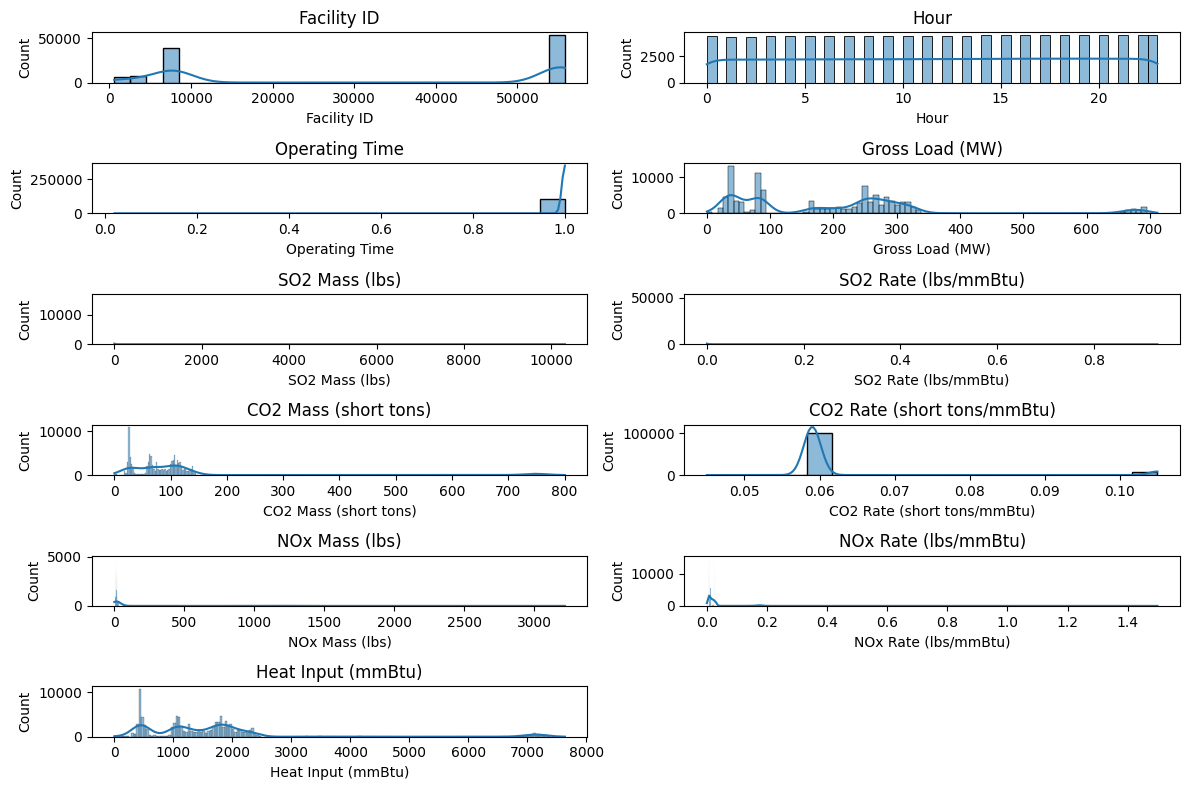

In [40]:
numerical_columns = df_cleaned.select_dtypes(include='number')
# Calculating number of rows and columns for subplot
# 1) plotting histplot for all features with numerical values
num_cols = len(numerical_columns.columns)
num_rows = (num_cols + 1) // 2 
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.columns):
    sns.histplot(data=df_cleaned, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col)
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

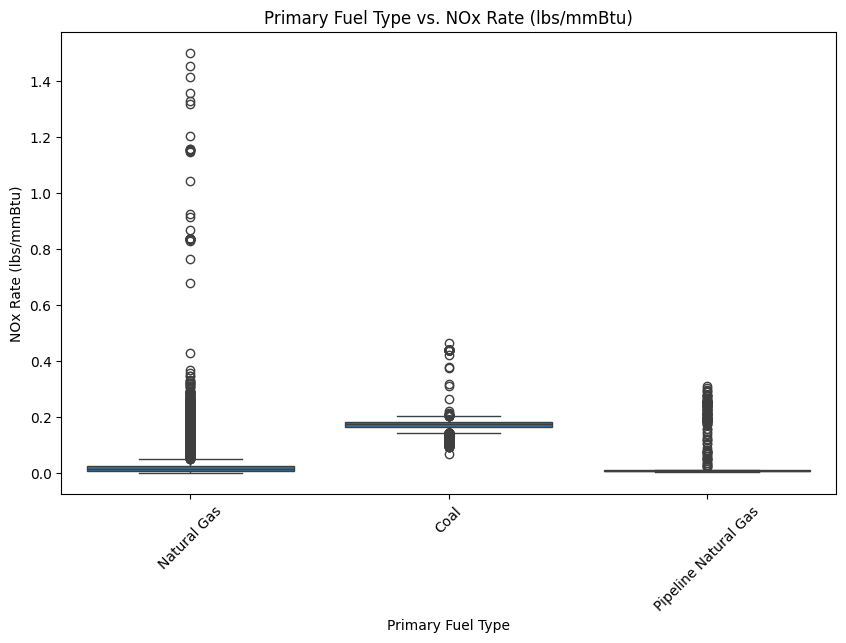

In [41]:
# 2.  Box Plot (Primary Fuel Type vs. NOx Rate) Shows the distribution and impact of different fuel types on NOx emissions.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary Fuel Type', y='NOx Rate (lbs/mmBtu)', data=df)
plt.title('Primary Fuel Type vs. NOx Rate (lbs/mmBtu)')
plt.xlabel('Primary Fuel Type')
plt.ylabel('NOx Rate (lbs/mmBtu)')
plt.xticks(rotation=45)
plt.show()

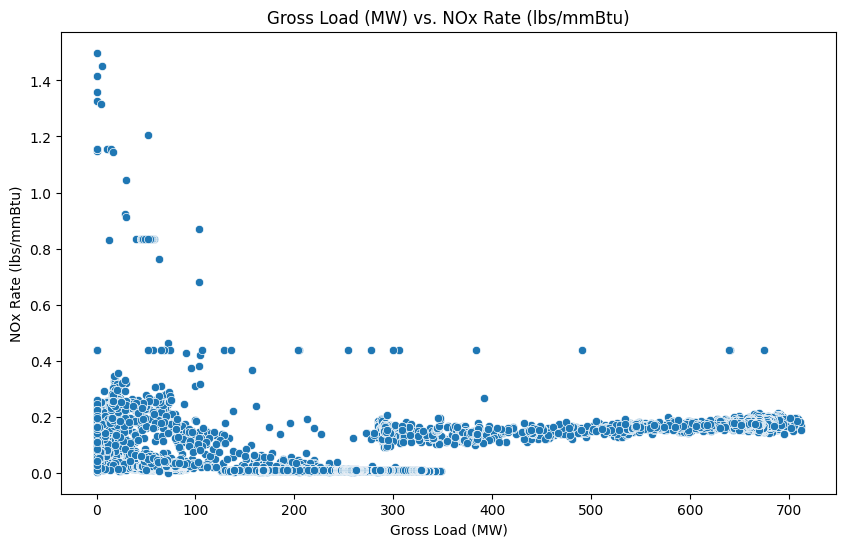

In [42]:
# 3) Scatter Plot (Gross Load vs. NOx Rate): Helps to visualize the relationship and potential linearity between load and NOx rates.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross Load (MW)', y='NOx Rate (lbs/mmBtu)', data=df)
plt.title('Gross Load (MW) vs. NOx Rate (lbs/mmBtu)')
plt.xlabel('Gross Load (MW)')
plt.ylabel('NOx Rate (lbs/mmBtu)')
plt.show()

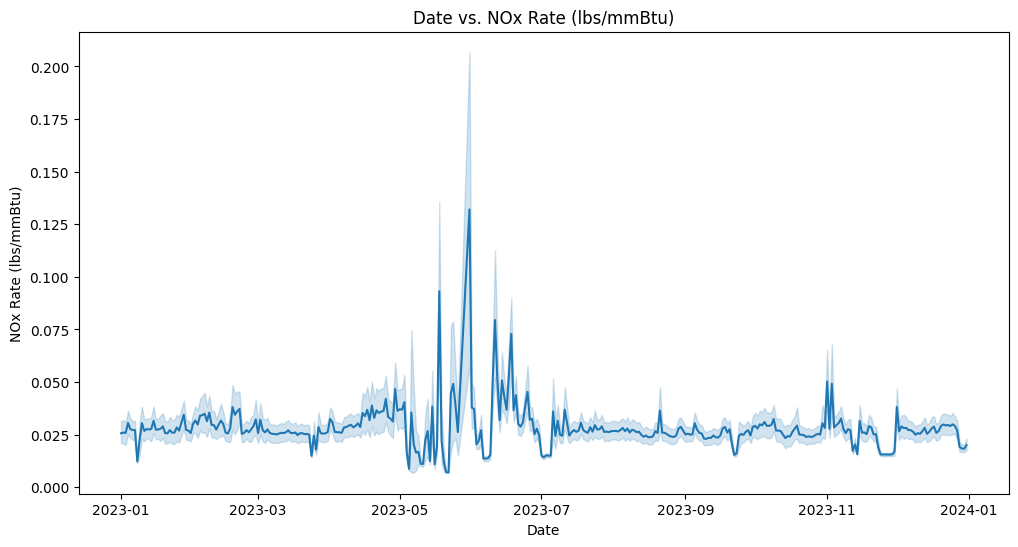

In [43]:
#4) Line Plot (Date vs. NOx Rate): Reveals temporal trends and seasonal patterns in NOx emissions.
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='NOx Rate (lbs/mmBtu)', data=df)
plt.title('Date vs. NOx Rate (lbs/mmBtu)')
plt.xlabel('Date')
plt.ylabel('NOx Rate (lbs/mmBtu)')
plt.show()

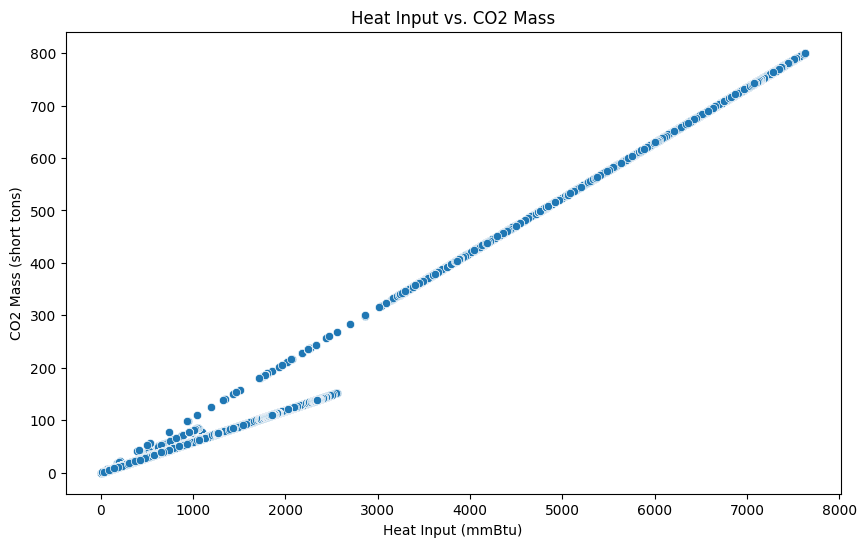

In [44]:
# 5) Scatter Plot of Heat Input vs. CO2 Mass how heat input influenced the CO2 mass rate 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heat Input (mmBtu)', y='CO2 Mass (short tons)', data=df_cleaned)
plt.title('Heat Input vs. CO2 Mass')
plt.xlabel('Heat Input (mmBtu)')
plt.ylabel('CO2 Mass (short tons)')
plt.show()

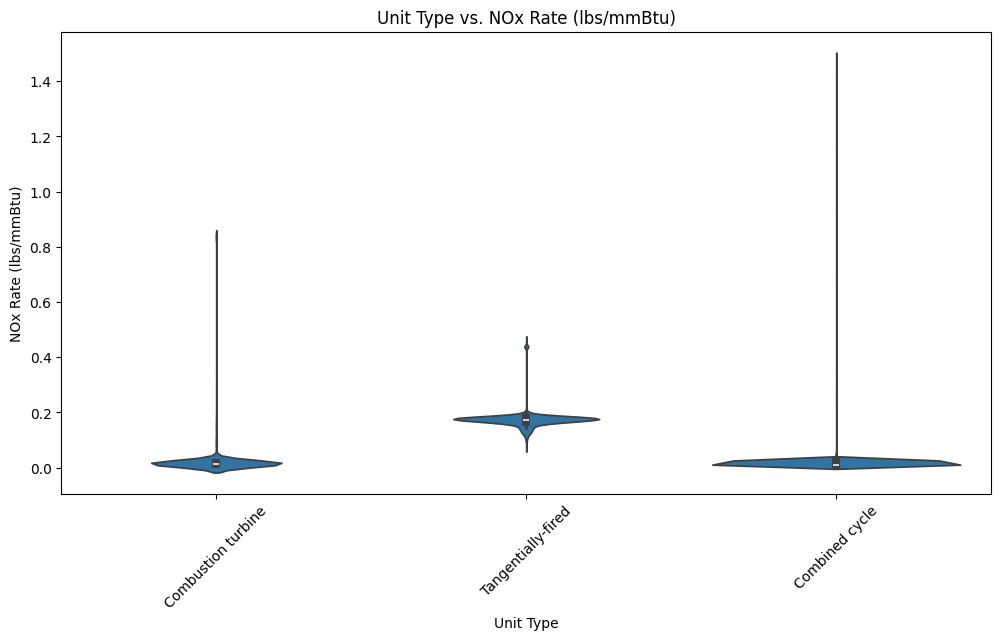

In [45]:
# 6) Violin Plot (Unit Type vs. NOx Rate) Shows the distribution of NOx rates across different unit types.
plt.figure(figsize=(12, 6))
sns.violinplot(x='Unit Type', y='NOx Rate (lbs/mmBtu)', data=df)
plt.title('Unit Type vs. NOx Rate (lbs/mmBtu)')
plt.xlabel('Unit Type')
plt.ylabel('NOx Rate (lbs/mmBtu)')
plt.xticks(rotation=45)
plt.show()


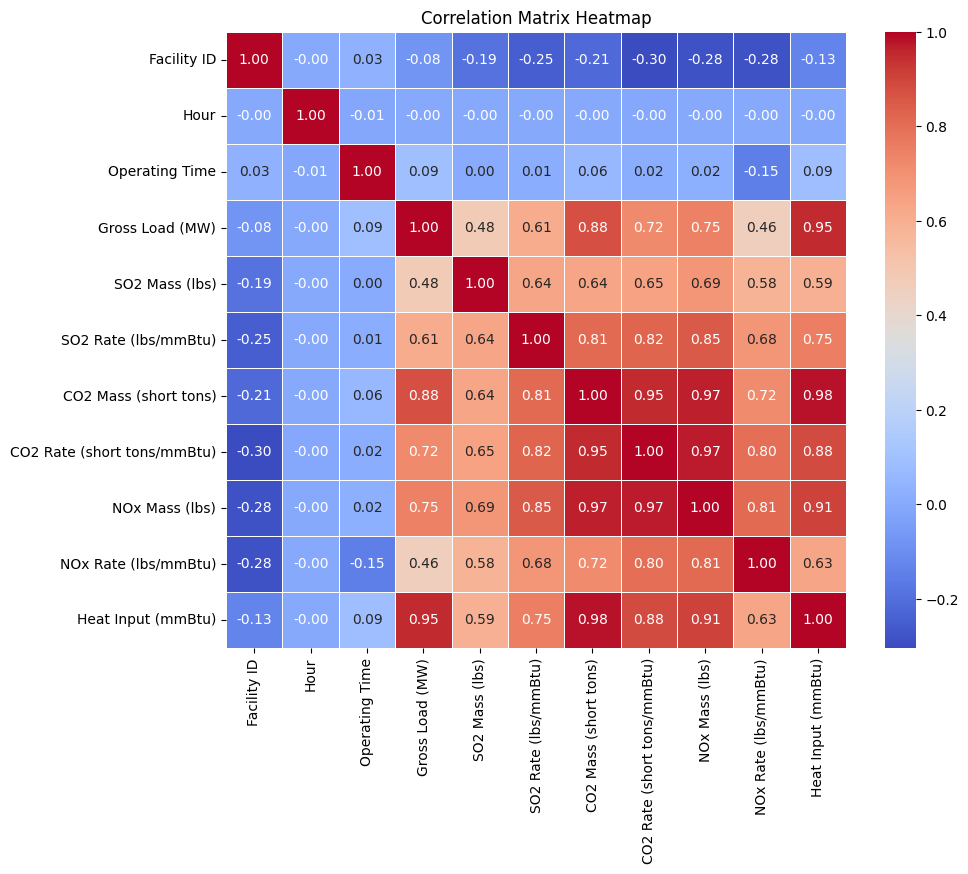

In [46]:
# 7) Correlation matrix for the numerical columns using heatmap
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 7)  Identifing uncorrelated or unrelated features. 

In [162]:
#identifing the features which are not related using co relation matrix and also dropping that feature 
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_cleaned[numeric_columns].corr()

In [163]:
target = 'NOx Rate (lbs/mmBtu)'
correlation_with_target = correlation_matrix[target].drop(target)

In [164]:
threshold = 0.1 
low_correlation_features = correlation_with_target[abs(correlation_with_target) < threshold].index.tolist()

In [165]:
print(f"Features with low correlation to the target variable:{low_correlation_features}")

Features with low correlation to the target variable:['Hour']


In [166]:
df_cleaned = df_cleaned.drop(columns=low_correlation_features) #dropping low correlation features

In [167]:
print("Original dataset shape:", df_cleaned.shape)

Original dataset shape: (106691, 25)


# 8. Converting categorical features into numerical using One-Hot Encoding 

In [168]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Unit ID'])

In [169]:
df_cleaned['Heat Input Measure Indicator'].replace('', 'Substitute', inplace=True)
df_cleaned = pd.get_dummies(df_cleaned, columns=['Heat Input Measure Indicator'])

# identifying columns with single unique value and dropping them as it won't help for the model like "State"

In [170]:
single_value_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
df_cleaned.drop(columns=single_value_columns, inplace=True)

In [171]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Facility Name']) #one hot coding

In [172]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['SO2 Mass Measure Indicator'])

In [173]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['CO2 Mass Measure Indicator'])

In [174]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Primary Fuel Type'])

In [175]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Unit Type'])

In [176]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['NOx Controls'])

In [177]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Program Code'])

In [178]:
df_cleaned.columns

Index(['Facility ID', 'Date', 'Operating Time', 'Gross Load (MW)',
       'SO2 Mass (lbs)', 'SO2 Rate (lbs/mmBtu)', 'CO2 Mass (short tons)',
       'CO2 Rate (short tons/mmBtu)', 'NOx Mass (lbs)', 'NOx Rate (lbs/mmBtu)',
       'NOx Rate Measure Indicator', 'Heat Input (mmBtu)', 'Unit ID_1',
       'Unit ID_2', 'Unit ID_BW-22', 'Unit ID_CT-1', 'Unit ID_CT-1A',
       'Unit ID_CT-1B', 'Unit ID_CT-2', 'Unit ID_CT-3', 'Unit ID_CT-4',
       'Unit ID_CTG-1', 'Unit ID_F1CT',
       'Heat Input Measure Indicator_Measured',
       'Heat Input Measure Indicator_Measured and Substitute',
       'Heat Input Measure Indicator_Substitute', 'Facility Name_Centralia',
       'Facility Name_Chehalis Generation Facility',
       'Facility Name_Encogen Generating Station',
       'Facility Name_Ferndale Generating Station',
       'Facility Name_Frederickson Power LP',
       'Facility Name_Fredonia Generating Station',
       'Facility Name_Goldendale Generating Station',
       'Facility Name_Grays H

In [179]:
# Convert boolean columns to integers
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'bool':
        df_cleaned[col] = df_cleaned[col].astype(int)

In [180]:
df_cleaned

,Facility ID,Date,Operating Time,Gross Load (MW),SO2 Mass (lbs),SO2 Rate (lbs/mmBtu),CO2 Mass (short tons),CO2 Rate (short tons/mmBtu),NOx Mass (lbs),NOx Rate (lbs/mmBtu),...,Unit Type_Tangentially-fired,"NOx Controls_Dry Low NOx Burners,Ammonia Injection,Selective Catalytic Reduction","NOx Controls_Dry Low NOx Burners,Selective Catalytic Reduction","NOx Controls_Dry Low NOx Burners,Water Injection,Selective Catalytic Reduction",NOx Controls_Low NOx Burner Technology w/ Closed-coupled/Separated OFA,NOx Controls_Selective Catalytic Reduction,"NOx Controls_Selective Catalytic Reduction,Steam Injection","NOx Controls_Water Injection,Selective Catalytic Reduction",Program Code_ARP,"Program Code_ARP, MATS"
1373,607,2023-02-27,0.1,16.0,0.039,0.002,1.3,0.059,2.668,0.122,...,0,0,0,0,0,0,0,1,1,0
1374,607,2023-02-27,1.0,57.0,1.008,0.002,33.2,0.059,11.184,0.020,...,0,0,0,0,0,0,0,1,1,0
1375,607,2023-02-27,1.0,58.0,1.012,0.002,33.4,0.059,8.421,0.015,...,0,0,0,0,0,0,0,1,1,0
1376,607,2023-02-27,1.0,54.0,0.807,0.002,36.5,0.069,11.082,0.021,...,0,0,0,0,0,0,0,1,1,0
1377,607,2023-02-27,1.0,52.0,0.600,0.001,41.9,0.081,7.228,0.014,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148915,55818,2023-12-31,1.0,261.0,1.107,0.001,109.6,0.059,18.449,0.010,...,0,1,0,0,0,0,0,0,1,0
148916,55818,2023-12-31,1.0,261.0,1.107,0.001,109.7,0.059,18.453,0.010,...,0,1,0,0,0,0,0,0,1,0
148917,55818,2023-12-31,1.0,261.0,1.108,0.001,109.7,0.059,18.461,0.010,...,0,1,0,0,0,0,0,0,1,0
148918,55818,2023-12-31,1.0,261.0,1.107,0.001,109.7,0.059,18.457,0.010,...,0,1,0,0,0,0,0,0,1,0


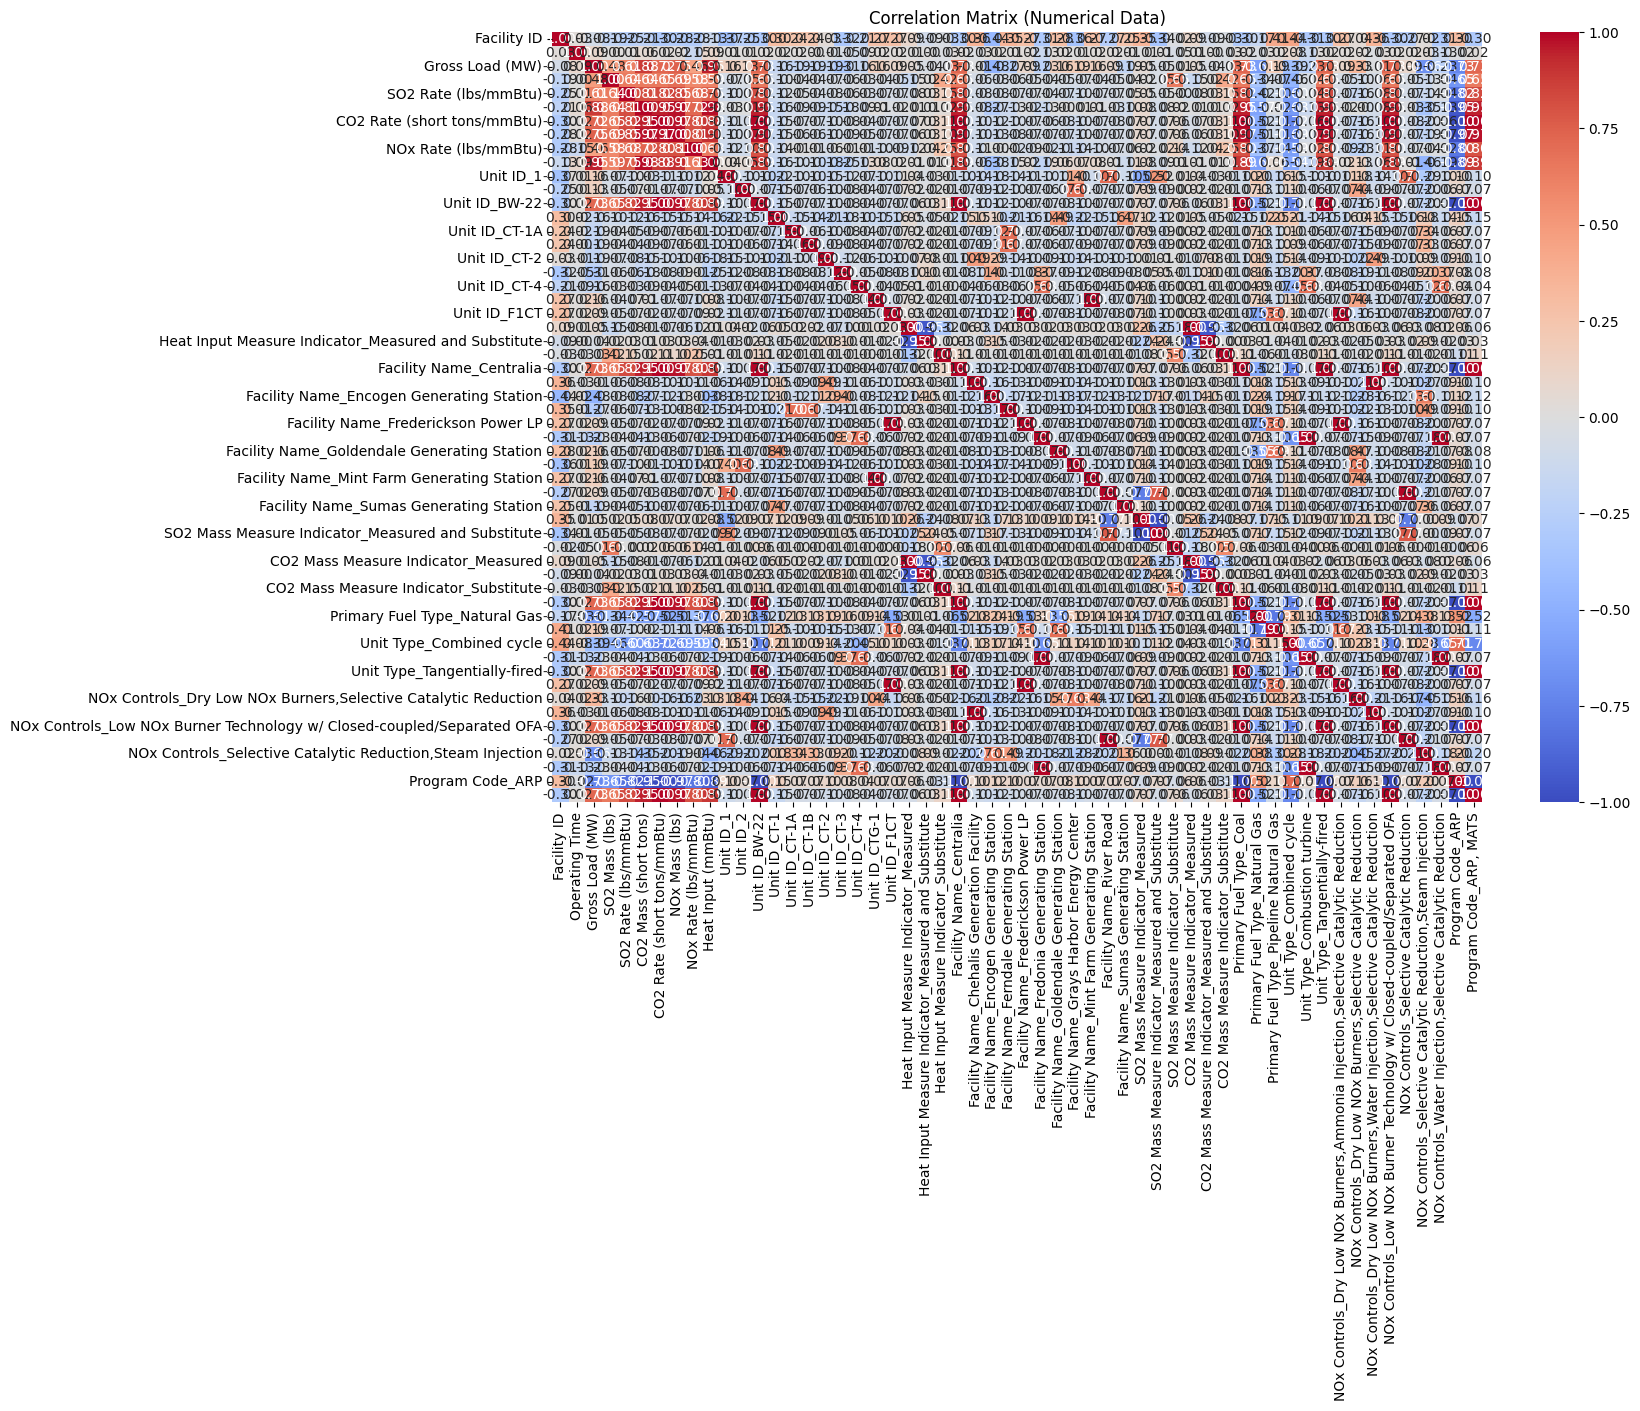

In [67]:
numerical_columns = df_cleaned.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Data)')
plt.show()

# 9) Normalize non-categorical features using MinMaxScaler

In [181]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = df_cleaned.select_dtypes(include='number')
scaler = MinMaxScaler() #standardizing data
scaled_data = scaler.fit_transform(numerical_columns)
df_cleaned = pd.DataFrame(scaled_data, columns=numerical_columns.columns)

In [182]:
df_cleaned

,Facility ID,Operating Time,Gross Load (MW),SO2 Mass (lbs),SO2 Rate (lbs/mmBtu),CO2 Mass (short tons),CO2 Rate (short tons/mmBtu),NOx Mass (lbs),NOx Rate (lbs/mmBtu),Heat Input (mmBtu),...,Unit Type_Tangentially-fired,"NOx Controls_Dry Low NOx Burners,Ammonia Injection,Selective Catalytic Reduction","NOx Controls_Dry Low NOx Burners,Selective Catalytic Reduction","NOx Controls_Dry Low NOx Burners,Water Injection,Selective Catalytic Reduction",NOx Controls_Low NOx Burner Technology w/ Closed-coupled/Separated OFA,NOx Controls_Selective Catalytic Reduction,"NOx Controls_Selective Catalytic Reduction,Steam Injection","NOx Controls_Water Injection,Selective Catalytic Reduction",Program Code_ARP,"Program Code_ARP, MATS"
0,0.0,0.081633,0.022472,0.000004,0.002146,0.001617,0.233333,0.000829,0.081388,0.002850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.000000,0.080056,0.000098,0.002146,0.041458,0.233333,0.003474,0.013342,0.073234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.000000,0.081461,0.000098,0.002146,0.041708,0.233333,0.002616,0.010007,0.073522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.000000,0.075843,0.000078,0.002146,0.045579,0.400000,0.003442,0.014009,0.069108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.000000,0.073034,0.000058,0.001073,0.052323,0.600000,0.002245,0.009340,0.067615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106686,1.0,1.000000,0.366573,0.000107,0.001073,0.136875,0.233333,0.005731,0.006671,0.241645,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106687,1.0,1.000000,0.366573,0.000107,0.001073,0.137000,0.233333,0.005732,0.006671,0.241698,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106688,1.0,1.000000,0.366573,0.000107,0.001073,0.137000,0.233333,0.005735,0.006671,0.241802,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106689,1.0,1.000000,0.366573,0.000107,0.001073,0.137000,0.233333,0.005733,0.006671,0.241750,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
df_cleaned.columns

Index(['Facility ID', 'Operating Time', 'Gross Load (MW)', 'SO2 Mass (lbs)',
       'SO2 Rate (lbs/mmBtu)', 'CO2 Mass (short tons)',
       'CO2 Rate (short tons/mmBtu)', 'NOx Mass (lbs)', 'NOx Rate (lbs/mmBtu)',
       'Heat Input (mmBtu)', 'Unit ID_1', 'Unit ID_2', 'Unit ID_BW-22',
       'Unit ID_CT-1', 'Unit ID_CT-1A', 'Unit ID_CT-1B', 'Unit ID_CT-2',
       'Unit ID_CT-3', 'Unit ID_CT-4', 'Unit ID_CTG-1', 'Unit ID_F1CT',
       'Heat Input Measure Indicator_Measured',
       'Heat Input Measure Indicator_Measured and Substitute',
       'Heat Input Measure Indicator_Substitute', 'Facility Name_Centralia',
       'Facility Name_Chehalis Generation Facility',
       'Facility Name_Encogen Generating Station',
       'Facility Name_Ferndale Generating Station',
       'Facility Name_Frederickson Power LP',
       'Facility Name_Fredonia Generating Station',
       'Facility Name_Goldendale Generating Station',
       'Facility Name_Grays Harbor Energy Center',
       'Facility Name_M

# 10) Choosing target Y and features X

In [334]:
features = df_cleaned[['Gross Load (MW)','SO2 Mass (lbs)','Heat Input (mmBtu)','NOx Mass (lbs)','CO2 Rate (short tons/mmBtu)',
                       'CO2 Mass (short tons)','SO2 Rate (lbs/mmBtu)','Program Code_ARP', 'Program Code_ARP, MATS','NOx Controls_Dry Low NOx Burners,Ammonia Injection,Selective Catalytic Reduction',
       'NOx Controls_Dry Low NOx Burners,Selective Catalytic Reduction',
       'NOx Controls_Dry Low NOx Burners,Water Injection,Selective Catalytic Reduction',
       'NOx Controls_Low NOx Burner Technology w/ Closed-coupled/Separated OFA',
       'NOx Controls_Selective Catalytic Reduction',
       'NOx Controls_Selective Catalytic Reduction,Steam Injection',
       'NOx Controls_Water Injection,Selective Catalytic Reduction','Primary Fuel Type_Coal',
       'Primary Fuel Type_Natural Gas',
       'Primary Fuel Type_Pipeline Natural Gas', 'Unit Type_Combined cycle',
       'Unit Type_Combustion turbine', 'Unit Type_Tangentially-fired','Primary Fuel Type_Coal',
       'Primary Fuel Type_Natural Gas',
       'Primary Fuel Type_Pipeline Natural Gas','SO2 Mass Measure Indicator_Measured',
       'SO2 Mass Measure Indicator_Measured and Substitute',
       'SO2 Mass Measure Indicator_Substitute',
       'CO2 Mass Measure Indicator_Measured',
       'CO2 Mass Measure Indicator_Measured and Substitute',
       'CO2 Mass Measure Indicator_Substitute','Facility Name_Centralia',
       'Facility Name_Chehalis Generation Facility',
       'Facility Name_Encogen Generating Station',
       'Facility Name_Ferndale Generating Station',
       'Facility Name_Frederickson Power LP',
       'Facility Name_Fredonia Generating Station',
       'Facility Name_Goldendale Generating Station',
       'Facility Name_Grays Harbor Energy Center',
       'Facility Name_Mint Farm Generating Station',
       'Facility Name_River Road', 'Facility Name_Sumas Generating Station',  'Heat Input Measure Indicator_Measured',
       'Heat Input Measure Indicator_Measured and Substitute',
       'Heat Input Measure Indicator_Substitute', 'Unit ID_1', 'Unit ID_2', 'Unit ID_BW-22',
       'Unit ID_CT-1', 'Unit ID_CT-1A', 'Unit ID_CT-1B', 'Unit ID_CT-2',
       'Unit ID_CT-3', 'Unit ID_CT-4', 'Unit ID_CTG-1', 'Unit ID_F1CT',]]
target = df_cleaned['NOx Rate (lbs/mmBtu)']
print(len(features.columns))

56


# 11) Spliting the dataset into training, testing and validation sets

In [335]:
# Spliting the dataset into training (75%) and testing + validation (25%)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.25, random_state=42)

# also spliting the temporary dataset into testing (50%) and validation (50%)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 12) shape of X_train, y_train, X_test, y_test, X_validation, y_validation

In [336]:
# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of y_validation:", y_validation.shape)

Shape of X_train: (80018, 56)
Shape of y_train: (80018,)
Shape of X_test: (13336, 56)
Shape of y_test: (13336,)
Shape of X_validation: (13337, 56)
Shape of y_validation: (13337,)


# Step 2: ML Models

In [337]:
# 1) using KNeighborsRegressor model
# Generate sample data
np.random.seed(0) #Generating seed for Numpy's random number generator #Setting a seed ensures reproducibility. It means that every time you run this code with the same seed, you will get the same random numbers. This is useful for debugging and sharing results
X = np.sort(5 * np.random.rand(80, 1), axis=0) # X is an array of shape (80, 1) containing 80 values uniformly distributed between 0 and 5, sorted in ascending order.
y = np.sin(X).ravel() # y is a 1-dimensional array of shape (80,), where each value is the sine of the corresponding value in X.

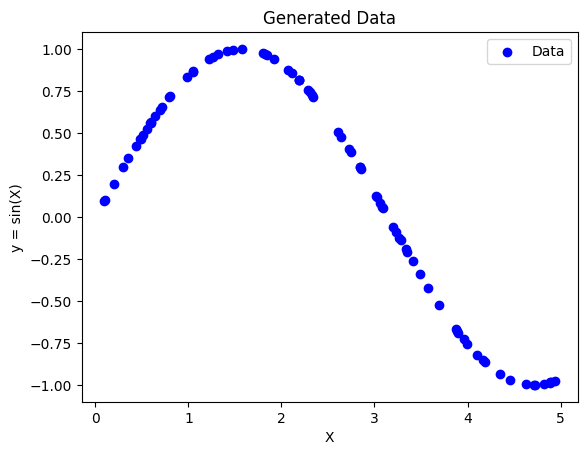

In [338]:
#Visualization of x and y values
plt.scatter(X, y, color='b', label='Data')
plt.title('Generated Data')
plt.xlabel('X')   #x values rangeing from 0 to 5
plt.ylabel('y = sin(X)')
plt.legend()
plt.show()

In [339]:
# Add noise to the targets
y[::5] += 0.5 - np.random.rand(16)  #starts at the beginning of array and takes every 5th element The np .random generates 16 random number 
#between 0 and 1,  Adds the generated noise values to the selected elements of y.

In [340]:
# Spliting the data into training, validation, and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 

In [341]:
# Fitting the KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=20)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [342]:
# Making predictions
model_knn_predict_test = model_knn.predict(X_test)
model_knn_predict_validation = model_knn.predict(X_validation)

In [343]:
# Evaluation metrics 
model_knn_mse_test = mean_squared_error(y_test, model_knn_predict_test) #for test data
print(f"MSE for test data : {model_knn_mse_test}")

MSE for test data : 0.09356287098496685


In [344]:
model_knn_r2_score_test = r2_score(y_test, model_knn_predict_test) #r2 score for test data
print(f"R2 score for test data : {model_knn_r2_score_test}")

R2 score for test data : 0.793985234716573


In [345]:
# Evaluation metrics
model_knn_mse_validation = mean_squared_error(y_validation, model_knn_predict_validation) #for validation set
print(f"MSE for validation data : {model_knn_mse_validation}")

MSE for validation data : 0.11244569357597431


In [346]:
model_knn_r2_score_validation = r2_score(y_validation, model_knn_predict_validation) #r2 score for validation data
print(f"R2 score for validation data : {model_knn_r2_score_validation}")

R2 score for validation data : 0.7490578725682342


In [347]:
# List of k values
k_values = list(range(1, 20))

In [348]:
# List to store the mse for each k
mse_values = []
# Looping over k values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_validation = knn.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred_validation)
    mse_values.append(mse)

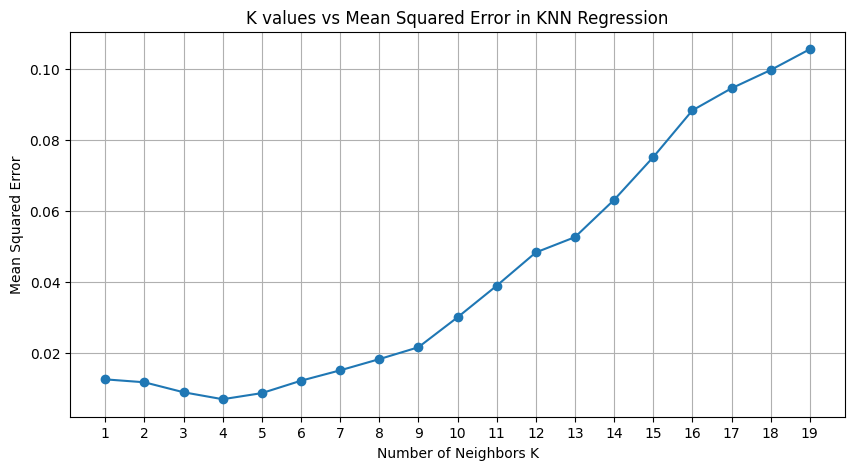

In [349]:
# Plot K values vs MSE
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_values, marker='o')
plt.title('K values vs Mean Squared Error in KNN Regression')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

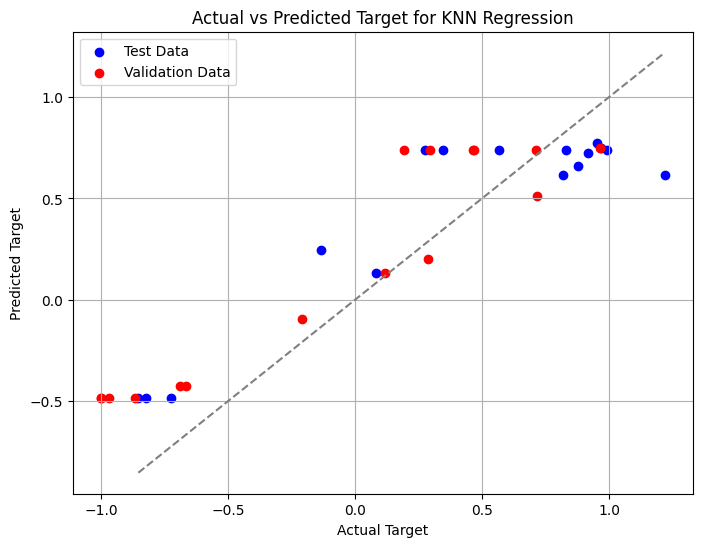

In [350]:
import matplotlib.pyplot as plt   #plotting for actual vs predicted target

plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_knn_predict_test, color='blue', label='Test Data')
plt.scatter(y_validation, model_knn_predict_validation, color='red', label='Validation Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target for KNN Regression')
plt.legend()
plt.grid(True)
plt.show()

In [351]:
# Spliting the dataset into training (80%) and testing + validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.25, random_state=42)

# spliting the temporary dataset into testing (50%) and validation (50%)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [352]:
# 2) Using Linear Regression Model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train) #fitting the mode

LinearRegression()

In [353]:
# Making predictions
model_linear_predict_test = model_linear.predict(X_test) #for test case
model_linear_predict_validation = model_linear.predict(X_validation) #for validation case

In [354]:
# evaluation metrics for test set
model_linear_mse_test = mean_squared_error(y_test, model_linear_predict_test)
print(f"MSE for test data : {model_linear_mse_test}")

MSE for test data : 0.00020831520116174716


In [355]:
model_linear_r2_score_test = r2_score(y_test, model_linear_predict_test) #Using R2 score
print(f"R2 score for test data : {model_linear_r2_score_test}")

R2 score for test data : 0.8061745912871335


In [356]:
model_linear_mse_validation = mean_squared_error(y_validation, model_linear_predict_validation) #For validation dataset
print(f"MSE for validation data : {model_linear_mse_validation}")

MSE for validation data : 0.00018564650573977485


In [357]:
model_linear_r2_score_validation = r2_score(y_validation, model_linear_predict_validation) #r2 validation
print(f"R2 score for validation data : {model_linear_r2_score_validation}")

R2 score for validation data : 0.8242146066095026


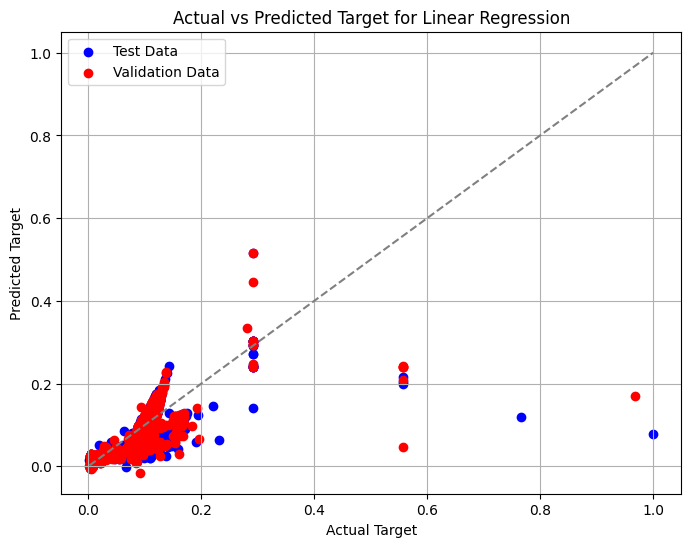

In [358]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
#plots for actual vs predicted target
plt.scatter(y_test, model_linear_predict_test, color='blue', label='Test Data')
plt.scatter(y_validation, model_linear_predict_validation, color='red', label='Validation Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [359]:
# 2) Using Ridge Regression Model
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

Ridge()

In [360]:
#making predictions
model_ridge_predict_test = model_ridge.predict(X_test)
model_ridge_predict_validation = model_ridge.predict(X_validation)

In [361]:
# evaluation metrics for test set
model_ridge_mse_test = mean_squared_error(y_test, model_ridge_predict_test)
print(f"MSE for test data : {model_ridge_mse_test}")

MSE for test data : 0.00020119922345103453


In [362]:
model_ridge_r2_score_test = r2_score(y_test, model_ridge_predict_test) #Using R2 score
print(f"R2 score for test data : {model_ridge_r2_score_test}")

R2 score for test data : 0.812795602526249


In [363]:
model_ridge_mse_validation = mean_squared_error(y_validation, model_ridge_predict_validation) #For validation dataset
print(f"MSE for validation data : {model_ridge_mse_validation}")

MSE for validation data : 0.00019557467840432483


In [364]:
model_ridge_r2_score_validation = r2_score(y_validation, model_ridge_predict_validation) #For r2 score
print(f"R2 score for validation data : {model_ridge_r2_score_validation}")

R2 score for validation data : 0.8148137954790575


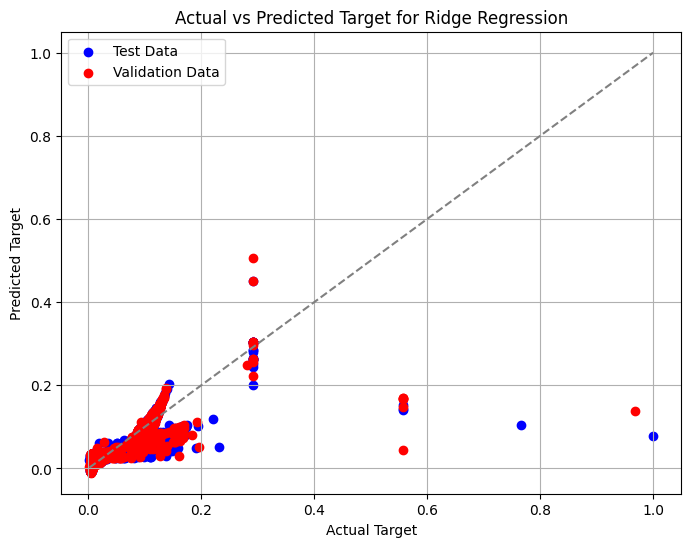

In [365]:
import matplotlib.pyplot as plt
#plots for actual vs prediction for ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_ridge_predict_test, color='blue', label='Test Data')
plt.scatter(y_validation, model_ridge_predict_validation, color='red', label='Validation Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


In [366]:
# 4) Using Bayesian Ridge Regression mode
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)

BayesianRidge()

In [367]:
#making predictions
model_bayesian_predict_test = model_bayesian.predict(X_test)
model_bayesian_predict_validation = model_bayesian.predict(X_validation)

In [368]:
# evaluation metrics for test set
model_bayesian_mse_test = mean_squared_error(y_test, model_bayesian_predict_test)
print(f"MSE for test data : {model_bayesian_mse_test}")

MSE for test data : 0.00020830455014692726


In [369]:
model_bayesian_r2_score_test = r2_score(y_test, model_bayesian_predict_test) #Using R2 score
print(f"R2 score for test data : {model_bayesian_r2_score_test}")

R2 score for test data : 0.806184501448702


In [370]:
model_bayesian_mse_validation = mean_squared_error(y_validation, model_bayesian_predict_validation) #For validation dataset
print(f"MSE for validation data : {model_bayesian_mse_validation}")

MSE for validation data : 0.00018567462363780097


In [371]:
model_bayesian_r2_score_validation = r2_score(y_validation, model_bayesian_predict_validation)
print(f"R2 score for validation data : {model_bayesian_r2_score_validation}")

R2 score for validation data : 0.8241879822690867


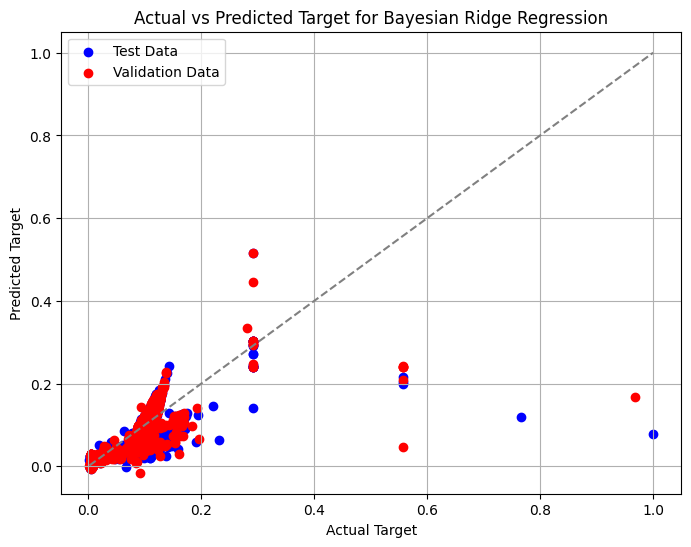

In [372]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_bayesian_predict_test, color='blue', label='Test Data')
plt.scatter(y_validation, model_bayesian_predict_validation, color='red', label='Validation Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target for Bayesian Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


In [373]:
# 5) using polynomial features with LinearRegression
poly_features = PolynomialFeatures(degree=1)  # You can adjust the degree as needed
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
X_poly_validation = poly_features.transform(X_validation)

In [374]:
# Initialize and train the Polynomial Regression model using training data
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

LinearRegression()

In [375]:
#making predictions
model_poly_predict_test = model_poly.predict(X_poly_test)
model_poly_predict_validation = model_poly.predict(X_poly_validation)

In [376]:
# evaluation metrics for test set
model_poly_mse_test = mean_squared_error(y_test, model_poly_predict_test)
print(f"MSE for test data : {model_poly_mse_test}")

MSE for test data : 0.00020847184349523745


In [377]:
model_poly_r2_score_test = r2_score(y_test, model_poly_predict_test) #Using R2 score
print(f"R2 score for test data : {model_poly_r2_score_test}")

R2 score for test data : 0.8060288445334585


In [378]:
model_poly_mse_validation = mean_squared_error(y_validation, model_poly_predict_validation) #For validation dataset
print(f"MSE for validation data : {model_poly_mse_validation}")

MSE for validation data : 0.00018606123175613363


In [379]:
model_poly_r2_score_validation = r2_score(y_validation, model_poly_predict_validation)
print(f"R2 score for validation data : {model_poly_r2_score_validation}")

R2 score for validation data : 0.8238219098784524


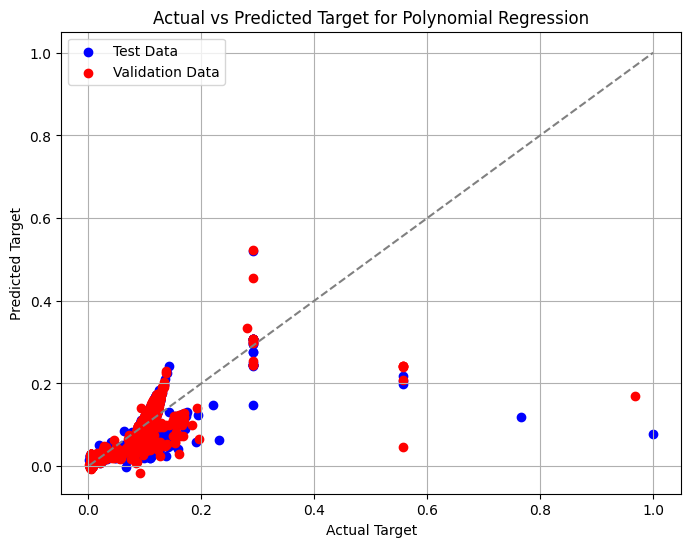

In [380]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_poly_predict_test, color='blue', label='Test Data')
plt.scatter(y_validation, model_poly_predict_validation, color='red', label='Validation Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target for Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


# Step 3: Intro to PyTorch and Building a NN 

# 1) Tensors

In [381]:
#Basic operations using torch 
# Creating a tensor from a list
# Create a tensor from a list
x = [[1, 2], [3, 4]]
data_x = torch.tensor(x)
data_x

tensor([[1, 2],
        [3, 4]])

In [240]:
# Creating a tensor from NumPy array
np_array = np.array(x)
np_x = torch.from_numpy(np_array)
np_x

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [241]:
# Creating a tensor with random values
shape = (2,3)
rand_tensor = torch.rand(shape)
rand_tensor

tensor([[0.9713, 0.6237, 0.5010],
        [0.3180, 0.4082, 0.3930]])

In [242]:
x_ones = torch.ones_like(rand_tensor) #ones
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_ones, dtype=torch.float)
x_rand

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 



tensor([[0.7069, 0.8736, 0.3084],
        [0.6763, 0.3952, 0.1103]])

In [243]:
tensor = torch.ones(4,4)
tensor[:,1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [244]:
t1 = torch.cat([tensor,tensor], dim=1)
t1

tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]])

In [245]:
tensor.mul(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [246]:
tensor.matmul(tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [247]:
tensor.add(5)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])

# 2) Introduction to torch.autograd

In [248]:
# Performing a sum operation
#creating tensor with requires_grad = True
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, requires_grad=True)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32, requires_grad=True)

In [249]:
# Perform operations
z = x + y
s = z.sum()

In [250]:
# Perform backpropagation
s.backward()
print("Gradient of x:\n", x.grad)
print("Gradient of y:\n", y.grad)

Gradient of x:
 tensor([[1., 1.],
        [1., 1.]])
Gradient of y:
 tensor([[1., 1.],
        [1., 1.]])


In [251]:
#2nd example

In [252]:
x = torch.tensor([[2.0, 3.0], [4.0, 5.0]], requires_grad=True)

In [253]:
y = x**2 + 2*x + 1   #y=x2+2x+1
z = y**2
out = z.sum()

In [254]:
print("x: \n", x)
print("y: \n", y)
print("z: \n", z)
print("out: \n", out)

x: 
 tensor([[2., 3.],
        [4., 5.]], requires_grad=True)
y: 
 tensor([[ 9., 16.],
        [25., 36.]], grad_fn=<AddBackward0>)
z: 
 tensor([[  81.,  256.],
        [ 625., 1296.]], grad_fn=<PowBackward0>)
out: 
 tensor(2258., grad_fn=<SumBackward0>)


In [255]:
# Perform backpropagation
out.backward()
print("Gradient of x: \n", x.grad)

Gradient of x: 
 tensor([[108., 256.],
        [500., 864.]])


In [256]:
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)  #single image with 3 channels and height and weight of 64
labels = torch.rand(1, 1000) # labels has shape

In [257]:
Y_pred = model(data)#forward prop

In [258]:
loss = (Y_pred - labels).sum() #backward prop
loss.backward()

In [259]:
optim = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum = 0.9)

In [260]:
optim.step()

In [261]:
a = torch.tensor([2., 3.], requires_grad = True)
b = torch.tensor([6., 4.], requires_grad = True)

In [262]:
Q = 3*a**3 - b**2

In [263]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [264]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [265]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand((5,5),requires_grad = True)
a = x + y
print(a.requires_grad)
b = a + z
b.requires_grad

False


True

In [266]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
#freeze all parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [267]:
from torch import nn, optim
model.fc = nn.Linear(512,10) #Now all parameters in the model except the parameters of model.fc are frozen

In [268]:
optimizer = optim.SGD(model.parameters(), lr = 1e-2, momentum = 0.9)

In [269]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

# 3. Neural Networks

In [270]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  # Initialize the superclass (nn.Module)
        self.conv1 = nn.Conv2d(1, 8, 3) # Define the first convolutional layer# Input channels = 1, output channels = 8, kernel size = 3
        self.conv2 = nn.Conv2d(8, 16, 3) # Input channels = 8, output channels = 16, kernel size = 3
        # Adjusted input size for fc1
        self.fc1 = nn.Linear(16 * 5 * 5, 128) # Input features = 16*5*5 (adjusted), output features = 128
        self.fc2 = nn.Linear(128, 64)  # Input features = 128, output features = 64
        self.fc3 = nn.Linear(64, 10)  # Input features = 64, output features = 10 (number of classes)
# Defining the forward pass
    def forward(self, input):
        c1 = F.relu(self.conv1(input)) # Appling the first convolutional layer and ReLU activation
        s2 = F.max_pool2d(c1, (2, 2))  # Apping max pooling
        c3 = F.relu(self.conv2(s2)) # Appling the second convolutional layer and ReLU activation
        s4 = F.max_pool2d(c3, 2)# Appling max pooling
        s4 = torch.flatten(s4, 1)# Flatten the output for the fully connected layers
        f5 = F.relu(self.fc1(s4))  # Appling the first fully connected layer and ReLU activation
        f6 = F.relu(self.fc2(f5))
        output = self.fc3(f6) # Appling the third fully connected layer to get the output
        return output
# Instantiate the model
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [271]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([8, 1, 3, 3])


In [272]:
input = torch.randn(1, 1, 28, 28)  # Change: Adjust input size to 28x28
out = net(input)
print(out)

tensor([[ 0.0248,  0.0155,  0.0549, -0.0857, -0.0737, -0.0564,  0.0725, -0.0660,
          0.0208, -0.0770]], grad_fn=<AddmmBackward0>)


In [273]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [274]:
output = net(input)
target = torch.randn(10).view(1, -1)
criterion = nn.MSELoss()

In [275]:
loss = criterion(output, target)
print(loss)

tensor(0.6574, grad_fn=<MseLossBackward0>)


In [276]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [277]:
net.zero_grad()

In [278]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None


In [279]:
loss.backward()

In [280]:
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([-0.0042,  0.0193,  0.0056, -0.0011, -0.0041,  0.0088, -0.0069, -0.0218])


In [281]:
class NetConfig1(nn.Module): #For Config 1
    def __init__(self):
        super(NetConfig1, self).__init__() # Initialize the superclass (nn.Module)
        self.conv1 = nn.Conv2d(3, 8, 3) # Input channels = 3 (e.g., RGB), output channels = 8, kernel size = 3
        self.conv2 = nn.Conv2d(8, 16, 3)# Input channels = 8, output channels = 16, kernel size = 3
        self.pool = nn.MaxPool2d(2, 2) # Kernel size = 2, stride = 2# Input features = 16*6*6 (adjusted), output features = 128
        self.fc1 = nn.Linear(16 * 6 * 6, 128)# Input features = 16*6*6 (adjusted), output features = 128
        self.fc2 = nn.Linear(128, 64) # Input features = 128, output features = 64
        self.fc3 = nn.Linear(64, 10) # Input features = 64, output features = 10 (number of classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x # Return the final output

In [282]:
class NetConfig2(nn.Module): #For Config 2
    def __init__(self):
        super(NetConfig2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = self.pool(x)
        x = F.tanh(self.conv2(x))
        x = self.pool(x)
        x = F.tanh(self.conv3(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [283]:
class NetConfig3(nn.Module): #For Config 3
    def __init__(self):
        super(NetConfig3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 6 * 6, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = self.pool(x)
        x = F.leaky_relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [284]:
# Training and evaluation functions
def train(net, optimizer, criterion, trainloader, epochs=2):
    for epoch in range(epochs):# Loop over the dataset multiple times (number of epochs)
        running_loss = 0.0 # Initialize running loss for the epoch
        for i, data in enumerate(trainloader, 0):  # Iterate over the data from the DataLoader
            inputs, labels = data # Get the inputs and labels from the data
            optimizer.zero_grad() # Zero the parameter gradients to prevent accumulation
            outputs = net(inputs) # Forward pass: compute the output of the network
            loss = criterion(outputs, labels) # Compute the loss between the predicted output and the actual labels
            loss.backward() # Backward pass: computing the gradients of the loss with respect to the network parameters
            optimizer.step()
            running_loss += loss.item() # Accumulate the loss
            if i % 2000 == 1999:  # Printing statistics every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}') # Printing epoch, mini-batch, and average loss
                running_loss = 0.0 # Reset running loss for the next set of mini-batches
    print('Finished Training')

In [285]:
def test(net, testloader, classes): # Defining the test function
    correct = 0 # Initialize the number of correct predictions
    total = 0 # Initialize the total number of predictions
    with torch.no_grad(): # Disable gradient calculation to save memory and computation
        for data in testloader:  # Iterate over the test data
            images, labels = data # Get the images and labels from the data
            outputs = net(images) # Forward pass: compute the output of the network
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0) # Update the total count
            correct += (predicted == labels).sum().item()  # Update the correct count
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [286]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [59]:
# Train and test Setup 1
net_config1 = NetConfig1()
optimizer_config1 = optim.SGD(net_config1.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
print("Setup 1 Training")
train(net_config1, optimizer_config1, criterion, trainloader)
print("Setup 1 Testing")
test(net_config1, testloader, classes)

Setup 1 Training
[1,  2000] loss: 2.243
[1,  4000] loss: 1.945
[1,  6000] loss: 1.716
[1,  8000] loss: 1.579
[1, 10000] loss: 1.513
[1, 12000] loss: 1.443
[2,  2000] loss: 1.400
[2,  4000] loss: 1.337
[2,  6000] loss: 1.338
[2,  8000] loss: 1.356
[2, 10000] loss: 1.280
[2, 12000] loss: 1.264
Finished Training
Setup 1 Testing
Accuracy of the network on the 10000 test images: 56 %


In [60]:
# Train and test Setup 2
net_config2 = NetConfig2()
optimizer_config2 = optim.Adam(net_config2.parameters(), lr=0.001)
print("Setup 2 Training")
train(net_config2, optimizer_config2, criterion, trainloader)
print("Setup 2 Testing")
test(net_config2, testloader, classes)

Setup 2 Training
[1,  2000] loss: 1.796
[1,  4000] loss: 1.549
[1,  6000] loss: 1.427
[1,  8000] loss: 1.347
[1, 10000] loss: 1.317
[1, 12000] loss: 1.261
[2,  2000] loss: 1.194
[2,  4000] loss: 1.172
[2,  6000] loss: 1.186
[2,  8000] loss: 1.155
[2, 10000] loss: 1.168
[2, 12000] loss: 1.138
Finished Training
Setup 2 Testing
Accuracy of the network on the 10000 test images: 59 %


In [61]:
# Train and test Setup 3
net_config3 = NetConfig3()
optimizer_config3 = optim.RMSprop(net_config3.parameters(), lr=0.001)
print("Setup 3 Training")
train(net_config3, optimizer_config3, criterion, trainloader)
print("Setup 3 Testing")
test(net_config3, testloader, classes)

Setup 3 Training
[1,  2000] loss: 1.700
[1,  4000] loss: 1.399
[1,  6000] loss: 1.272
[1,  8000] loss: 1.230
[1, 10000] loss: 1.173
[1, 12000] loss: 1.148
[2,  2000] loss: 1.029
[2,  4000] loss: 1.037
[2,  6000] loss: 1.027
[2,  8000] loss: 1.020
[2, 10000] loss: 1.010
[2, 12000] loss: 1.014
Finished Training
Setup 3 Testing
Accuracy of the network on the 10000 test images: 66 %


# 4. Training a Classifier

In [287]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


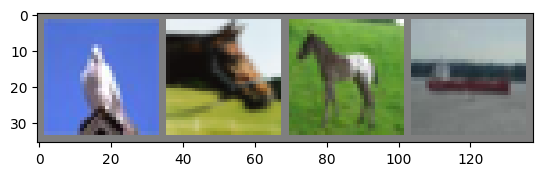

bird  horse horse ship 


In [288]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [289]:
#Configuration 1 
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [290]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [67]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # to get the inputs data in a list 
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.217
[1,  4000] loss: 1.832
[1,  6000] loss: 1.643
[1,  8000] loss: 1.561
[1, 10000] loss: 1.499
[1, 12000] loss: 1.446
[2,  2000] loss: 1.386
[2,  4000] loss: 1.363
[2,  6000] loss: 1.339
[2,  8000] loss: 1.314
[2, 10000] loss: 1.284
[2, 12000] loss: 1.271
Finished Training


In [68]:
PATH = './image_net.pth'
torch.save(net.state_dict(), PATH)

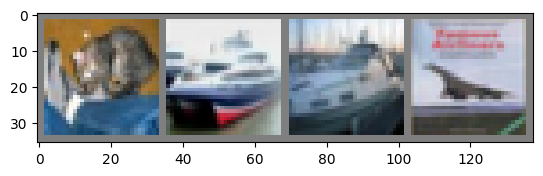

GroundTruth:  cat   ship  ship  plane


In [69]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [70]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [71]:
outputs = net(images)

In [72]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   ship 


In [96]:
#New combined
# Transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [97]:
# Load CIFAR-10 Dataset
def load_data(batch_size=4):
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return trainloader, testloader, classes

In [98]:
# Show some images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [99]:
# Training function
def train_model(model, trainloader, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 500 == 499:  # Print every 500 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.3f}')
                running_loss = 0.0
    print('Finished Training')

In [100]:
# Testing function
def test_model(model, testloader, classes):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # Accuracy for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [101]:
# Define network configurations
class NetConfig1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #defining convolution layers in channel and out channel 3 and kerenl 5 *5
        self.pool = nn.MaxPool2d(2, 2) #defining pooling layer #2 * 2 stride 2
        self.conv2 = nn.Conv2d(6, 16, 5) # another convo layer with 5 * 5 
        self.fc1 = nn.Linear(16 * 5 * 5, 120)#fully connected layers with in features 16 * 5 * 5
        self.fc2 = nn.Linear(120, 84) #out features as # 120
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #applying the first convo layer with relu activation and pooling 
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten the tensor to feed to all connection layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) #applying the fully connected layer the output one
        return x

In [102]:
class NetConfig2(nn.Module):
    def __init__(self):
        super().__init__() # Call the constructor of the parent class (nn.Module)
        self.conv1 = nn.Conv2d(3, 6, 5) # Input channels: 3 (RGB images), Output channels: 6, Kernel size: 5
        self.pool = nn.MaxPool2d(2, 2) # Kernel size: 2x2, Stride: 2
        self.conv2 = nn.Conv2d(6, 16, 5)  # Input channels: 6, Output channels: 16, Kernel size: 5
        self.fc1 = nn.Linear(16 * 5 * 5, 240) # Input features: 16*5*5 (output from conv layers), Output features: 240
        self.fc2 = nn.Linear(240, 100)  # Input features: 240, Output features: 100
        self.fc3 = nn.Linear(100, 10) # Input features: 100, Output features: 10 (number of classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #applying the 1st convo layer followed by relu and max pool
        x = self.pool(F.relu(self.conv2(x))) #applying the 2nd convo layer followed by relu and max pool
        x = torch.flatten(x, 1) #flatter the output 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [103]:
class NetConfig3(nn.Module):
    def __init__(self):
        super().__init__()  # Call the constructor of the parent class (nn.Module)
        self.conv1 = nn.Conv2d(3, 6, 5)   # Input channels: 3 (RGB images), Output channels: 6, Kernel size: 5
        self.pool = nn.MaxPool2d(2, 2) # Kernel size: 2x2, Stride: 2
        self.conv2 = nn.Conv2d(6, 16, 5) # Input channels: 6, Output channels: 16, Kernel size: 5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # Input features: 16*5*5 (output from conv layers), Output features: 120
        self.fc2 = nn.Linear(120, 84) # Input features: 120, Output features: 84
        self.fc3 = nn.Linear(84, 10) # Input features: 84, Output features: 10 (number of classes)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x), negative_slope=0.01))
        x = self.pool(F.leaky_relu(self.conv2(x), negative_slope=0.01))
        x = torch.flatten(x, 1)
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)
        x = self.fc3(x)
        return x

In [104]:
# Configuration 1 Training
print("Configuration 1 Training")
net1 = NetConfig1()
optimizer1 = optim.Adam(net1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_model(net1, trainloader, criterion, optimizer1)


Configuration 1 Training
[1,   500] loss: 2.146
[1,  1000] loss: 1.981
[1,  1500] loss: 1.814
[1,  2000] loss: 1.730
[1,  2500] loss: 1.670
[1,  3000] loss: 1.649
[1,  3500] loss: 1.601
[1,  4000] loss: 1.555
[1,  4500] loss: 1.591
[1,  5000] loss: 1.574
[1,  5500] loss: 1.506
[1,  6000] loss: 1.538
[1,  6500] loss: 1.484
[1,  7000] loss: 1.499
[1,  7500] loss: 1.503
[1,  8000] loss: 1.475
[1,  8500] loss: 1.487
[1,  9000] loss: 1.450
[1,  9500] loss: 1.455
[1, 10000] loss: 1.473
[1, 10500] loss: 1.399
[1, 11000] loss: 1.440
[1, 11500] loss: 1.434
[1, 12000] loss: 1.456
[1, 12500] loss: 1.400
[2,   500] loss: 1.347
[2,  1000] loss: 1.364
[2,  1500] loss: 1.357
[2,  2000] loss: 1.381
[2,  2500] loss: 1.357
[2,  3000] loss: 1.373
[2,  3500] loss: 1.339
[2,  4000] loss: 1.303
[2,  4500] loss: 1.378
[2,  5000] loss: 1.330
[2,  5500] loss: 1.347
[2,  6000] loss: 1.335
[2,  6500] loss: 1.375
[2,  7000] loss: 1.266
[2,  7500] loss: 1.353
[2,  8000] loss: 1.335
[2,  8500] loss: 1.334
[2,  9000

In [105]:
# Configuration 1 Testing
print("Configuration 1 Testing")
test_model(net1, testloader, classes)

Configuration 1 Testing
Accuracy of the network on the 10000 test images: 55 %
Accuracy for class: plane is 57.9 %
Accuracy for class: car   is 72.1 %
Accuracy for class: bird  is 39.8 %
Accuracy for class: cat   is 25.2 %
Accuracy for class: deer  is 34.1 %
Accuracy for class: dog   is 45.8 %
Accuracy for class: frog  is 76.3 %
Accuracy for class: horse is 63.1 %
Accuracy for class: ship  is 78.2 %
Accuracy for class: truck is 64.6 %


In [106]:
# Configuration 2 Training
print("Configuration 2 Training")
net2 = NetConfig2()
optimizer2 = optim.Adam(net2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_model(net2, trainloader, criterion, optimizer2)


Configuration 2 Training
[1,   500] loss: 2.117
[1,  1000] loss: 1.874
[1,  1500] loss: 1.758
[1,  2000] loss: 1.691
[1,  2500] loss: 1.626
[1,  3000] loss: 1.642
[1,  3500] loss: 1.584
[1,  4000] loss: 1.562
[1,  4500] loss: 1.485
[1,  5000] loss: 1.527
[1,  5500] loss: 1.570
[1,  6000] loss: 1.465
[1,  6500] loss: 1.460
[1,  7000] loss: 1.481
[1,  7500] loss: 1.474
[1,  8000] loss: 1.468
[1,  8500] loss: 1.437
[1,  9000] loss: 1.394
[1,  9500] loss: 1.443
[1, 10000] loss: 1.390
[1, 10500] loss: 1.389
[1, 11000] loss: 1.377
[1, 11500] loss: 1.372
[1, 12000] loss: 1.360
[1, 12500] loss: 1.338
[2,   500] loss: 1.294
[2,  1000] loss: 1.324
[2,  1500] loss: 1.337
[2,  2000] loss: 1.294
[2,  2500] loss: 1.312
[2,  3000] loss: 1.344
[2,  3500] loss: 1.310
[2,  4000] loss: 1.280
[2,  4500] loss: 1.292
[2,  5000] loss: 1.329
[2,  5500] loss: 1.279
[2,  6000] loss: 1.243
[2,  6500] loss: 1.313
[2,  7000] loss: 1.283
[2,  7500] loss: 1.246
[2,  8000] loss: 1.275
[2,  8500] loss: 1.231
[2,  9000

In [107]:
# Configuration 2 Testing
print("Configuration 2 Testing")
test_model(net2, testloader, classes)


Configuration 2 Testing
Accuracy of the network on the 10000 test images: 56 %
Accuracy for class: plane is 72.0 %
Accuracy for class: car   is 73.8 %
Accuracy for class: bird  is 27.2 %
Accuracy for class: cat   is 32.7 %
Accuracy for class: deer  is 60.3 %
Accuracy for class: dog   is 52.7 %
Accuracy for class: frog  is 70.7 %
Accuracy for class: horse is 54.4 %
Accuracy for class: ship  is 57.2 %
Accuracy for class: truck is 66.4 %


In [108]:
# Configuration 3 Training
print("Configuration 3 Training")
net3 = NetConfig3()
optimizer3 = optim.Adam(net3.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_model(net3, trainloader, criterion, optimizer3)


Configuration 3 Training
[1,   500] loss: 2.102
[1,  1000] loss: 1.871
[1,  1500] loss: 1.757
[1,  2000] loss: 1.713
[1,  2500] loss: 1.649
[1,  3000] loss: 1.655
[1,  3500] loss: 1.596
[1,  4000] loss: 1.538
[1,  4500] loss: 1.525
[1,  5000] loss: 1.496
[1,  5500] loss: 1.561
[1,  6000] loss: 1.488
[1,  6500] loss: 1.465
[1,  7000] loss: 1.476
[1,  7500] loss: 1.456
[1,  8000] loss: 1.462
[1,  8500] loss: 1.436
[1,  9000] loss: 1.439
[1,  9500] loss: 1.432
[1, 10000] loss: 1.433
[1, 10500] loss: 1.385
[1, 11000] loss: 1.388
[1, 11500] loss: 1.375
[1, 12000] loss: 1.412
[1, 12500] loss: 1.378
[2,   500] loss: 1.277
[2,  1000] loss: 1.278
[2,  1500] loss: 1.339
[2,  2000] loss: 1.293
[2,  2500] loss: 1.329
[2,  3000] loss: 1.320
[2,  3500] loss: 1.254
[2,  4000] loss: 1.267
[2,  4500] loss: 1.279
[2,  5000] loss: 1.284
[2,  5500] loss: 1.267
[2,  6000] loss: 1.248
[2,  6500] loss: 1.240
[2,  7000] loss: 1.324
[2,  7500] loss: 1.276
[2,  8000] loss: 1.252
[2,  8500] loss: 1.245
[2,  9000

In [109]:
# Configuration 3 Testing
print("Configuration 3 Testing")
test_model(net3, testloader, classes)


Configuration 3 Testing
Accuracy of the network on the 10000 test images: 57 %
Accuracy for class: plane is 69.3 %
Accuracy for class: car   is 66.8 %
Accuracy for class: bird  is 30.3 %
Accuracy for class: cat   is 36.6 %
Accuracy for class: deer  is 54.7 %
Accuracy for class: dog   is 44.9 %
Accuracy for class: frog  is 82.2 %
Accuracy for class: horse is 53.5 %
Accuracy for class: ship  is 64.9 %
Accuracy for class: truck is 67.7 %


# Neural Network For problem defined in part 1

In [382]:
#compare and analyse the results
# Define the mean_squared_error and r2_score functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    SS_res = np.sum((y_true - y_pred) ** 2)
    SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (SS_res / SS_tot)

In [383]:
# Define the model
class Net(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(Net, self).__init__()  # Calling the constructor of the parent class (nn.Module)
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])  # Input size: input_size, Output size: hidden_sizes[0]
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])  # Input size: hidden_sizes[0], Output size: hidden_sizes[1]
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2]) # Input size: hidden_sizes[1], Output size: hidden_sizes[2]
        self.fc4 = nn.Linear(hidden_sizes[2], output_size) # Input size: hidden_sizes[2], Output size: output_size

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Appling the first fully connected layer followed by ReLU activation
        x = torch.relu(self.fc2(x)) # Appling the second fully connected layer followed by ReLU activation
        x = torch.relu(self.fc3(x))
        x = self.fc4(x) # Appling the fourth fully connected layer
        return x


In [384]:
# Training configuration
input_size = len(features.columns) # Number of input features
hidden_sizes = [128, 64, 32]  # Number of neurons in the hidden layers basically hyperparameters
output_size = 1 # Number of output neurons
learning_rate = 0.001 # Learning rate for the optimizer (hyperparameter)
num_epochs = 100 # Number of training epochs

In [385]:
# Initialize the model
model = Net(input_size, hidden_sizes, output_size) # Here, Net is the class defining the neural network structure. 
# input_size, hidden_sizes, and output_size are parameters that define the architecture of the network.
# nn.MSELoss() is used as the loss function. 
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optim.Adam is an adaptive learning rate optimizer that adjusts the learning rate for each parameter.
# model.parameters() returns the model parameters that need to be optimized.
# lr=learning_rate specifies the learning rate for the optimizer.

In [386]:
# Lists to store training loss
train_losses = []

In [387]:
# Training the model
for epoch in range(num_epochs): # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the parameter gradients
    outputs = model(X_train_tensor) # Forward pass: compute the model output for the training data
    loss = criterion(outputs, y_train_tensor) # Compute the loss between the model output and the ground truth
    loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
    optimizer.step()  # Update the model parameters using the computed gradients
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0: # Print the loss every 10 epochs
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}') # Print the current epoch and loss

Epoch [10/100], Loss: 0.0005
Epoch [20/100], Loss: 0.0004
Epoch [30/100], Loss: 0.0004
Epoch [40/100], Loss: 0.0003
Epoch [50/100], Loss: 0.0003
Epoch [60/100], Loss: 0.0003
Epoch [70/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0003
Epoch [100/100], Loss: 0.0003


In [388]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

In [389]:
# Calculate metrics
mse_test = mean_squared_error(y_test_tensor.numpy(), y_pred_test.numpy())
r2_test = r2_score(y_test_tensor.numpy(), y_pred_test.numpy())
print("Best Model - Test Set:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)

Best Model - Test Set:
Mean Squared Error: 0.00022485422
R2 Score: 0.7907859832048416


In [390]:
# Save the best model
torch.save(model.state_dict(), 'nn_model.pth')

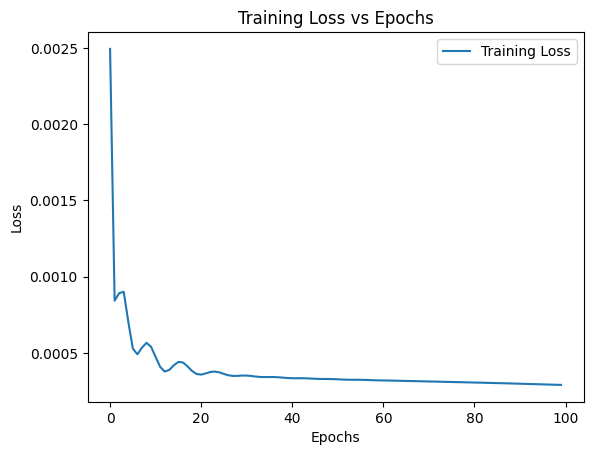

In [391]:
# Plot loss vs epochs
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

In [412]:
# Dictionary to store results and appending all the mse and r2 score
results = {
    'Model': [],
    'MSE_Test': [],
    'R2_Test': []
}

results['Model'].append('KNN Regression')
results['MSE_Test'].append(model_knn_mse_test)
results['R2_Test'].append(model_knn_r2_score_test)

results['Model'].append('Linear Regression')
results['MSE_Test'].append(model_linear_mse_test)
results['R2_Test'].append(model_linear_r2_score_test)

results['Model'].append('Ridge Regression')
results['MSE_Test'].append(model_ridge_mse_test)
results['R2_Test'].append(model_ridge_r2_score_test)

results['Model'].append('Bayesian Ridge Regression')
results['MSE_Test'].append(model_bayesian_mse_test)
results['R2_Test'].append(model_bayesian_r2_score_test)

results['Model'].append('Neural Network')
results['MSE_Test'].append(mse_test)
results['R2_Test'].append(r2_test)

In [417]:
print("Results:")
for model, mse, r2 in zip(results['Model'], results['MSE_Test'], results['R2_Test']):
    print(f"Model: {model}, MSE: {mse}, R2: {r2}")

Results:
Model: KNN Regression, MSE: 0.09356287098496685, R2: 0.793985234716573
Model: Linear Regression, MSE: 0.00020831520116174716, R2: 0.8061745912871335
Model: Ridge Regression, MSE: 0.00020119922345103453, R2: 0.812795602526249
Model: Bayesian Ridge Regression, MSE: 0.00020830455014692726, R2: 0.806184501448702
Model: Neural Network, MSE: 0.00022485421504825354, R2: 0.7907859832048416


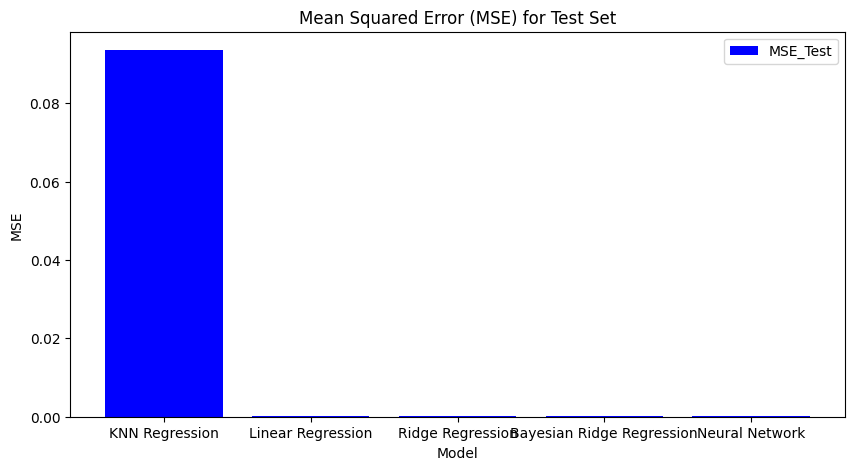

In [418]:
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['MSE_Test'], color='blue', label='MSE_Test')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) for Test Set')
plt.legend()
plt.show()

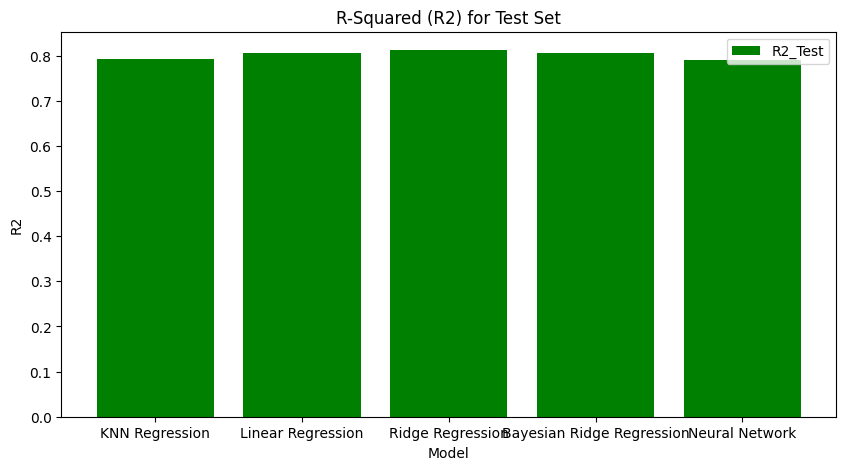

In [419]:
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['R2_Test'], color='green', label='R2_Test')
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R-Squared (R2) for Test Set')
plt.legend()
plt.show()

In [421]:
pip install torchsummary


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [422]:
from torchsummary import summary

# Define the model
model = Net(input_size, hidden_sizes, output_size)

# Print the model summary
summary(model, input_size=(1, input_size))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]           7,296
            Linear-2                [-1, 1, 64]           8,256
            Linear-3                [-1, 1, 32]           2,080
            Linear-4                 [-1, 1, 1]              33
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
